### **(배경)**

여러분은 지금부터 포르투갈 은행의 마케팅 담당자입니다. 데이터는 2008년부터 2010년까 지의 은행 마케팅 캠페인 데이터를 포함하고 있습니다.

여러분의 목표는 이 데이터를 통해 고객이 정기 예금을 가입할 가능성을 예측하고, 이를 통해 마케팅 캠페인의 효율성을 높이는 것 입니다. 마케팅 담당자로서 정기 예금과 관련이 있는 요소들을 파악해보고, 고객의 행동을 이해해보세요.

어떤 상황에서 어떤 고객들이 정기 예금을 가입할까요?

이번 미션의 최종 목표는 가장 정확한 분류 모델을 개발하여 고객이 정기 예금을 가입할지 여부를 예측하고, 그 모델을 통해 도출한 인사이트를 바탕으로 비즈니스 전략을 제시하는 것입니다.

### **일반적인 기준**

**2~5%**: 금융업 마케팅 캠페인에서 보통 수준
→ 많은 사람들에게 연락했지만 예금까지 이어지는 건 소수라는 의미

**5~10%**: 상위 수준의 성과
→ 금융 상품이라는 특성상 진입 장벽이 높기 때문에 10%는 꽤 성공적인 캠페인이라고 할 수 있다고 함.

**10% 이상**: 매우 높은 성과
→ 이건 뭔가 아주 잘 맞는 타겟팅이나 매력적인 조건이 있었던 것

# 데이터 로드

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv("./data/bank-additional-full.csv", sep=';')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [7]:
data.shape

(41188, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
# 데이터프레임의 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns',data.shape[1])
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# EDA

In [14]:
sns.set(font="LINE Seed Sans KR", rc={"axes.unicode_minus":False}, style='white',font_scale= 1.1)

## 결측치

In [17]:
# 결측치 없음.
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

## 중복값 처리

In [20]:
display(data[data.duplicated()])

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [22]:
data.duplicated().sum()

12

In [24]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

## 'y' 컬럼 데이터타입 변환 (float -> int64)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

In [29]:
data["y"].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [31]:
data["y"] = np.where(data["y"] == "yes", 1, 0).astype(int)

In [33]:
data["y"].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null  floa

## 이상치

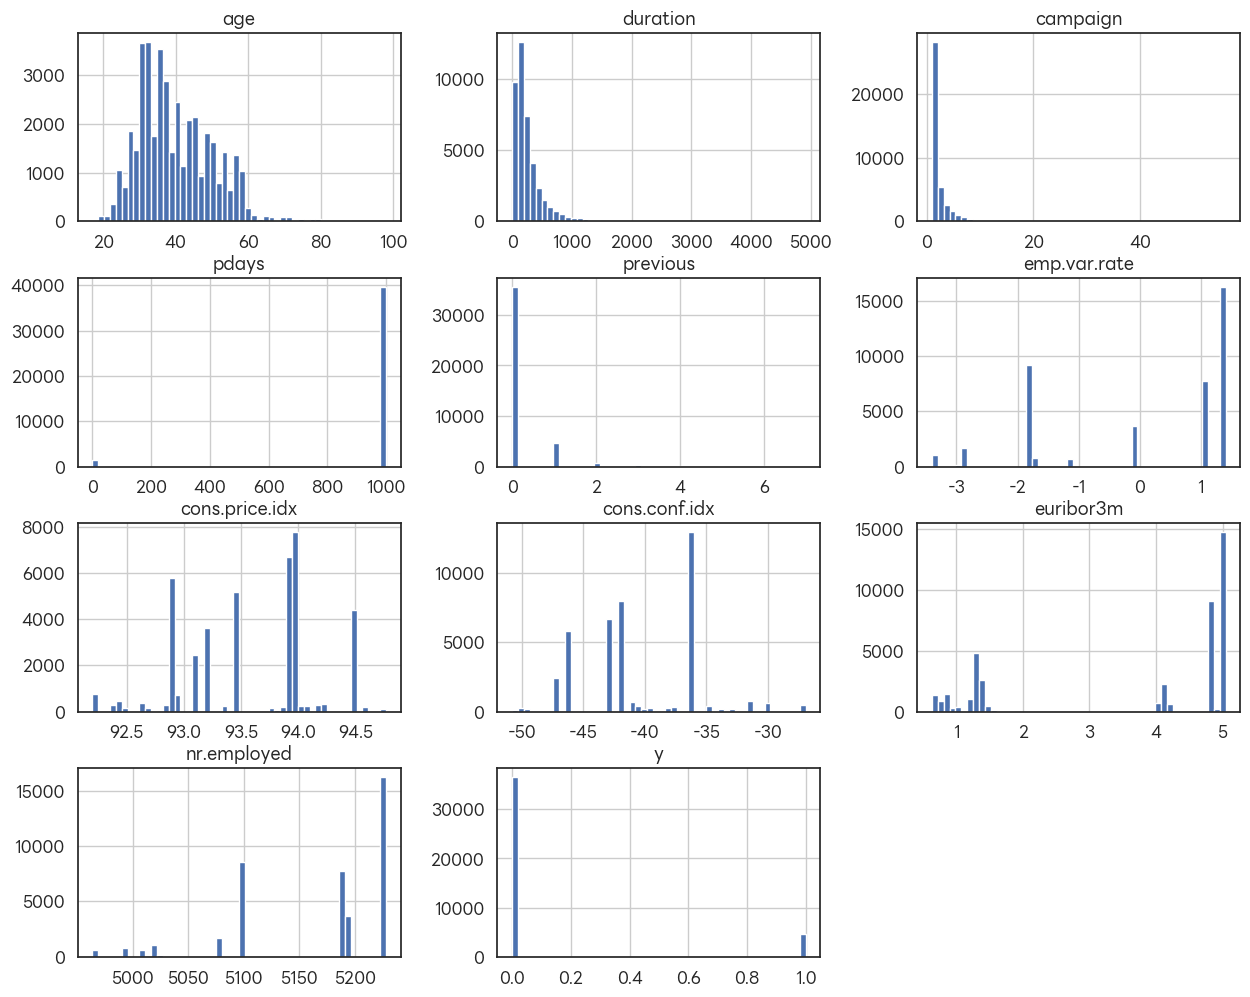

In [25]:
data.hist(figsize=(15, 12), bins=50)
plt.show()

In [26]:
# 수치형 컬럼만 선택
numeric_cols = data.select_dtypes(include=['number']).columns

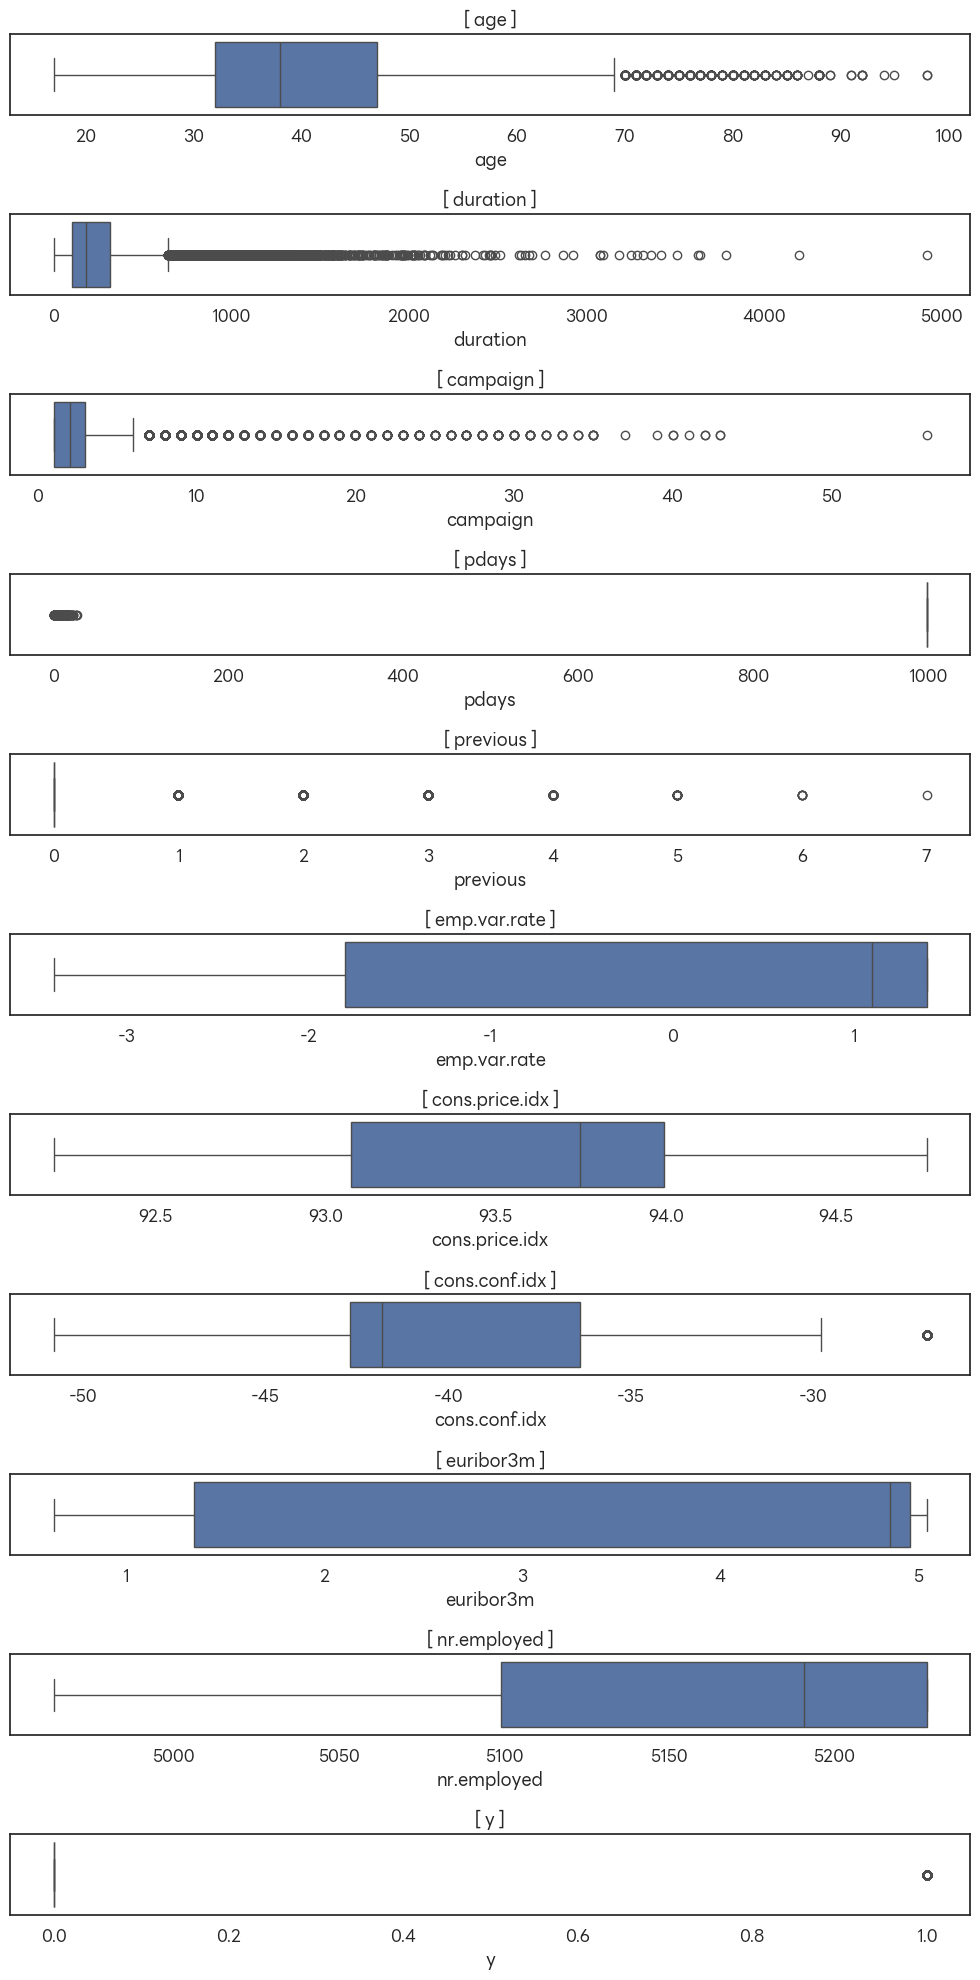

In [27]:
plt.figure(figsize=(10, 20))


for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 1, i)
    sns.boxplot(x=data[col])
    plt.title(f"[ {col} ]")

plt.tight_layout()
plt.show()

In [28]:
# 이상치 개수 확인
for col in numeric_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"{col} : {len(outliers)}")

age : 468
duration : 2963
campaign : 2406
pdays : 1515
previous : 5625
emp.var.rate : 0
cons.price.idx : 0
cons.conf.idx : 446
euribor3m : 0
nr.employed : 0
y : 4639


- age : 468  
- duration : 2963 --> 데이터 설명에 예측 모델을 만들 목적이라면 삭제하라고 했기에 삭제.
- campaign : 2406
- pdays : 1515 --> 'pdays'= 999 값 존재 --> 999 컬럼 생성
- previous : 5625 
- cons.conf.idx : 446

In [30]:
for col in data.columns :
    
    print(f'-----{col}------')
    print(data[col].unique())
    print('-----------------')

-----age------
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
-----------------
-----job------
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
-----------------
-----marital------
['married' 'single' 'divorced' 'unknown']
-----------------
-----education------
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
-----------------
-----default------
['no' 'unknown' 'yes']
-----------------
-----housing------
['no' 'yes' 'unknown']
-----------------
-----loan------
['no' 'yes' 'unknown']
-----------------
-----contact------
['telephone' 'cellular']
-----------------
-----month------
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' '

In [31]:
def plot_hist_qq(data, column):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # 히스토그램
    sns.histplot(data[column], bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram of {column}")

    # Q-Q 플롯
    stats.probplot(data[column], dist="norm", plot=axes[1])
    axes[1].set_title(f"Q-Q Plot of {column}")

    plt.tight_layout()
    plt.show()

### age의 이상치

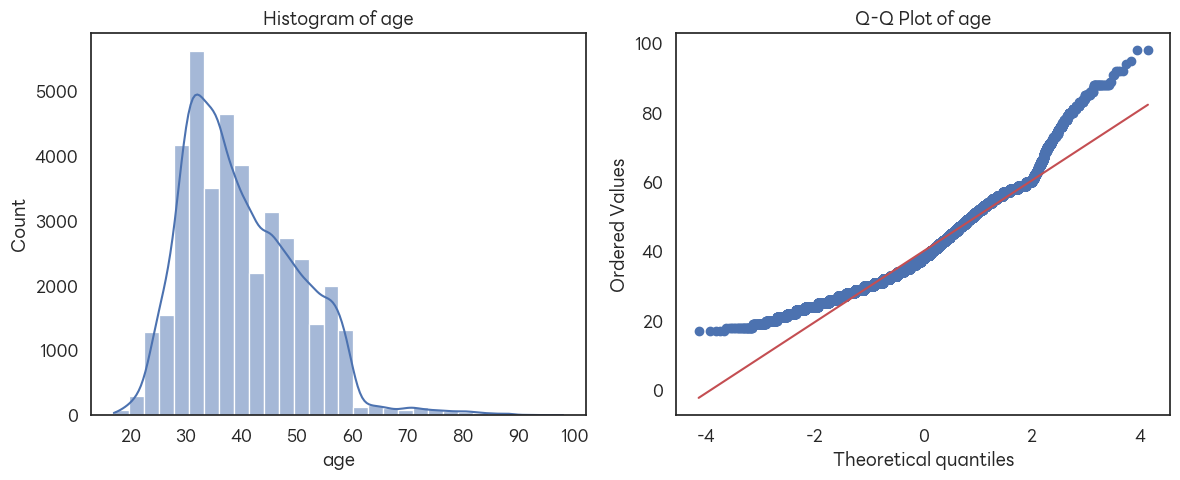

In [33]:
plot_hist_qq(data,'age')

### duration 이상치

In [35]:
# 데이터 설명에 예측 모델을 만들 목적이라면 삭제하라고 했기에 컬럼 삭제.
# data.drop(columns=['duration'])
# data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### campaign 이상치

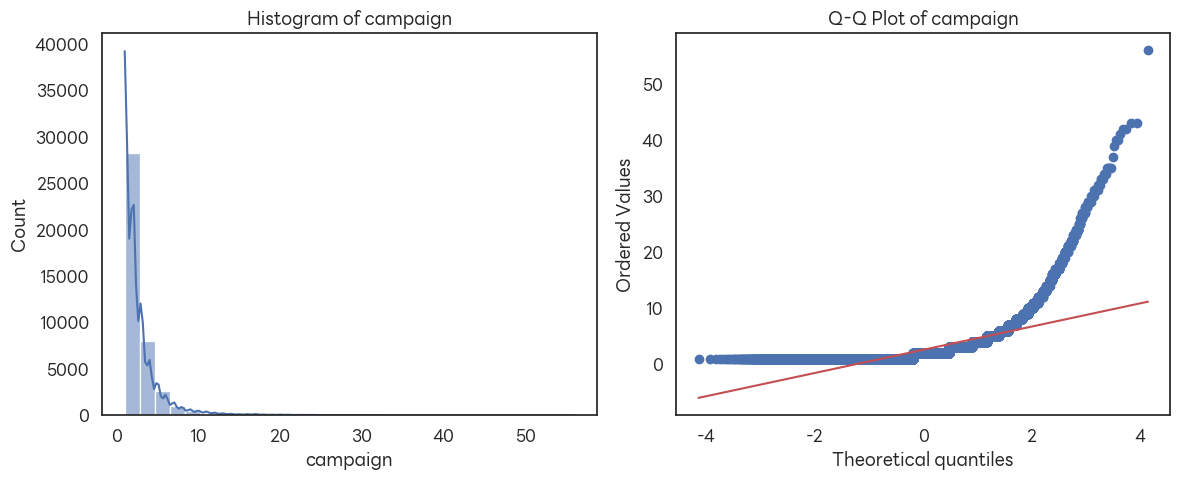

In [37]:
# campaign 이상치 탐색
plot_hist_qq(data,'campaign')

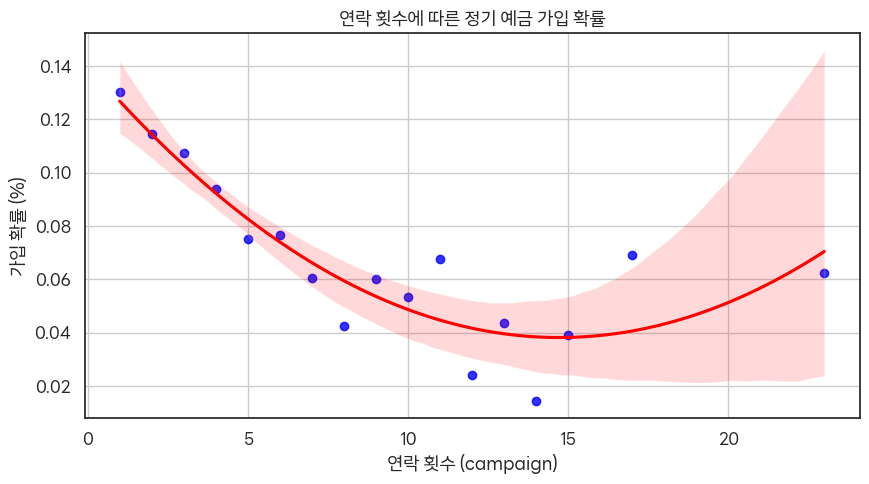

In [38]:
# 연락 횟수별 가입 비율 계산
campaign_analysis = data.groupby('campaign')['y'].value_counts(normalize=True).unstack()

# 가입 확률 ('1' 비율) 추출
subscription_rate = campaign_analysis[1]

plt.figure(figsize=(10, 5))
sns.regplot(x=subscription_rate.index, y=subscription_rate.values, 
            scatter_kws={'color':'blue'}, line_kws={'color':'red'}, order=2)

plt.xlabel("연락 횟수 (campaign)")
plt.ylabel("가입 확률 (%)")
plt.title("연락 횟수에 따른 정기 예금 가입 확률")
plt.grid()
plt.show()

### pdays 이상치

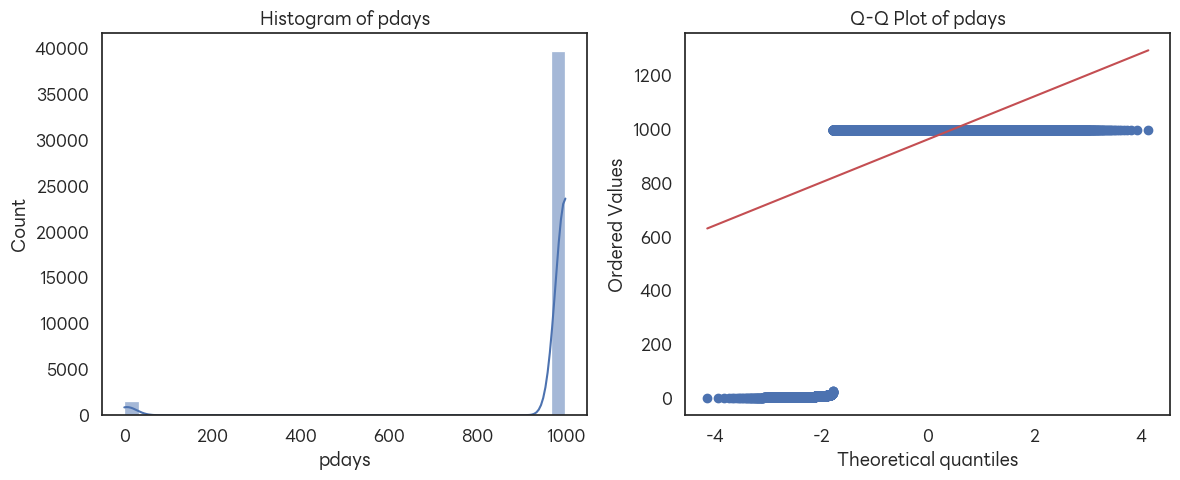

In [40]:
# pdays 이상치 탐색
plot_hist_qq(data,'pdays')

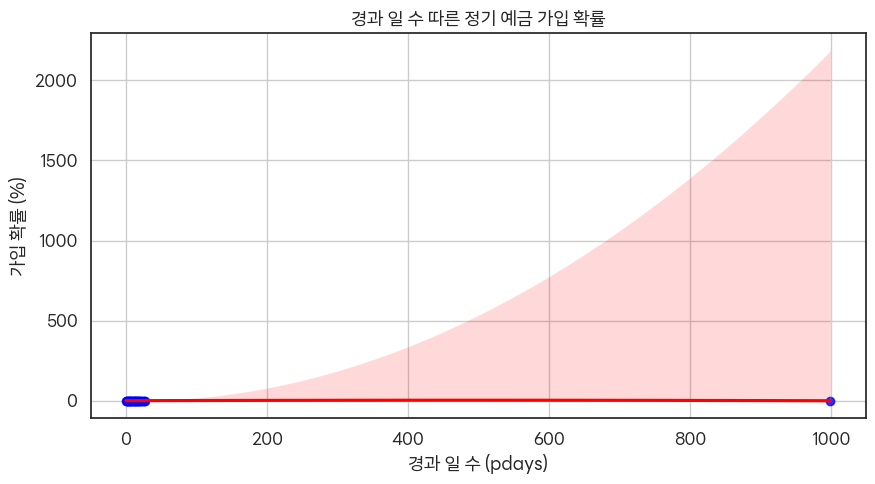

In [41]:
# 마지막 연락 후 경과일 수별 가입 비율 계산
pdays_analysis = data.groupby('pdays')['y'].value_counts(normalize=True).unstack()

# 가입 확률 ('1' 비율) 추출
subscription_rate = pdays_analysis[1]

plt.figure(figsize=(10, 5))
sns.regplot(x=subscription_rate.index, y=subscription_rate.values, 
            scatter_kws={'color':'blue'}, line_kws={'color':'red'}, order=2)

plt.xlabel("경과 일 수 (pdays)")
plt.ylabel("가입 확률 (%)")
plt.title("경과 일 수 따른 정기 예금 가입 확률")
plt.grid()
plt.show()

In [42]:
len(data[data['pdays'] == 999])

39661

In [43]:
# 'previous'가 999인 경우 1, 아닌 경우 0으로 표시하는 새로운 변수 생성
#data['pdays_999'] = (data['pdays'] == 999).astype(int)
#data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'pdays_999'],
      dtype='object')

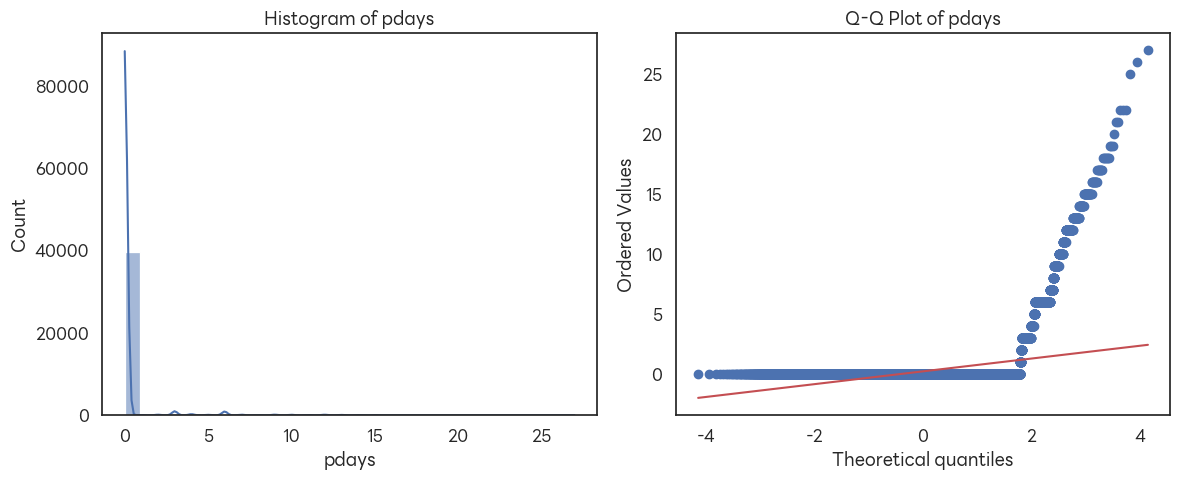

In [44]:
# 'previous' 컬럼에서 999 값을 0으로 변환
#data['pdays'] = data['pdays'].replace(999, 0)
#plot_hist_qq(data,'pdays')

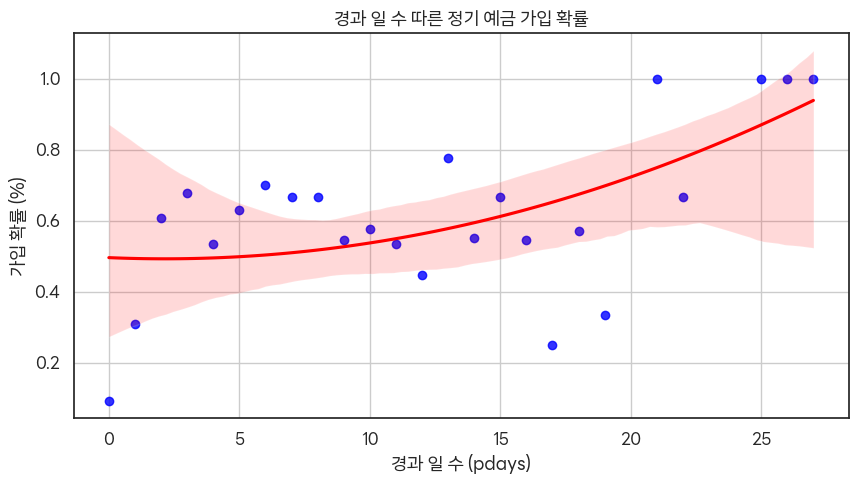

In [45]:
# 마지막 연락 후 경과 일 수별 가입 비율 계산
pdays_analysis = data.groupby('pdays')['y'].value_counts(normalize=True).unstack()

# 가입 확률 ('1' 비율) 추출
subscription_rate = pdays_analysis[1]

plt.figure(figsize=(10, 5))
sns.regplot(x=subscription_rate.index, y=subscription_rate.values, 
            scatter_kws={'color':'blue'}, line_kws={'color':'red'}, order=2)

plt.xlabel("경과 일 수 (pdays)")
plt.ylabel("가입 확률 (%)")
plt.title("경과 일 수 따른 정기 예금 가입 확률")
plt.grid()
plt.show()

- 데이터 보존을 위해서 삭제하지 않음.
- previous_999 컬럼을 통해 999였던 데이터(신규 고객)를 구분 가능
- previous 컬럼은 정상적인 숫자(0, 1, 2, ...)만 가지도록 변경
- 999를 0으로 변환하면 previous 컬럼이 정상적인 숫자로 유지됨
- 신규 고객과 기존 고객을 구분할 수 있어 모델 성능 향상 가능

### previous 이상치

/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
/opt/anaconda3/lib/python3.12/site-packages/seaborn/regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


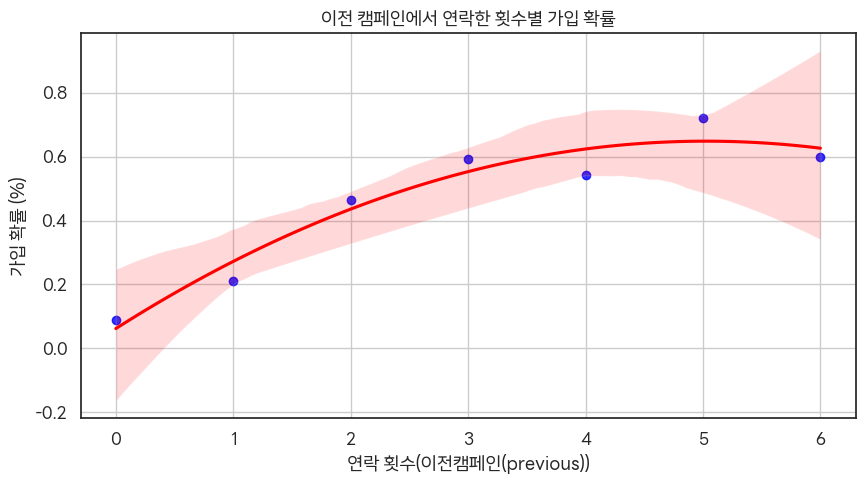

In [48]:
# 이전 캠페인에서 연락한 횟수별 가입 비율 계산
previous_analysis = data.groupby('previous')['y'].value_counts(normalize=True).unstack()

# 가입 확률 ('1' 비율) 추출
subscription_rate = previous_analysis[1]

plt.figure(figsize=(10, 5))
sns.regplot(x=subscription_rate.index, y=subscription_rate.values, 
            scatter_kws={'color':'blue'}, line_kws={'color':'red'}, order=2)

plt.xlabel("연락 횟수(이전캠페인(previous))")
plt.ylabel("가입 확률 (%)")
plt.title("이전 캠페인에서 연락한 횟수별 가입 확률")
plt.grid()
plt.show()

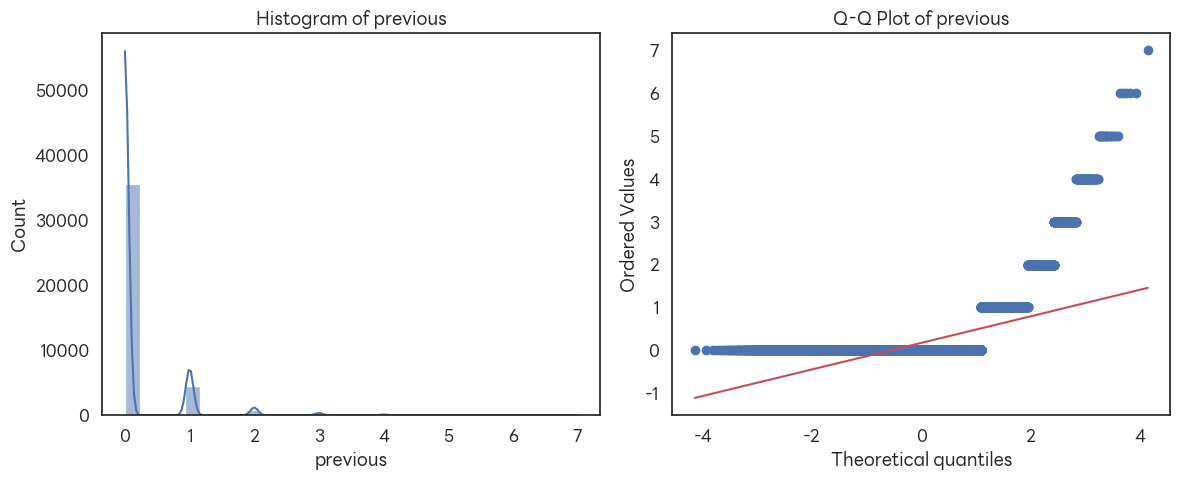

In [49]:
plot_hist_qq(data,'previous')

## 상관관계 & feature engineering

In [37]:
pd.set_option('display.max_columns',data.shape[1])
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


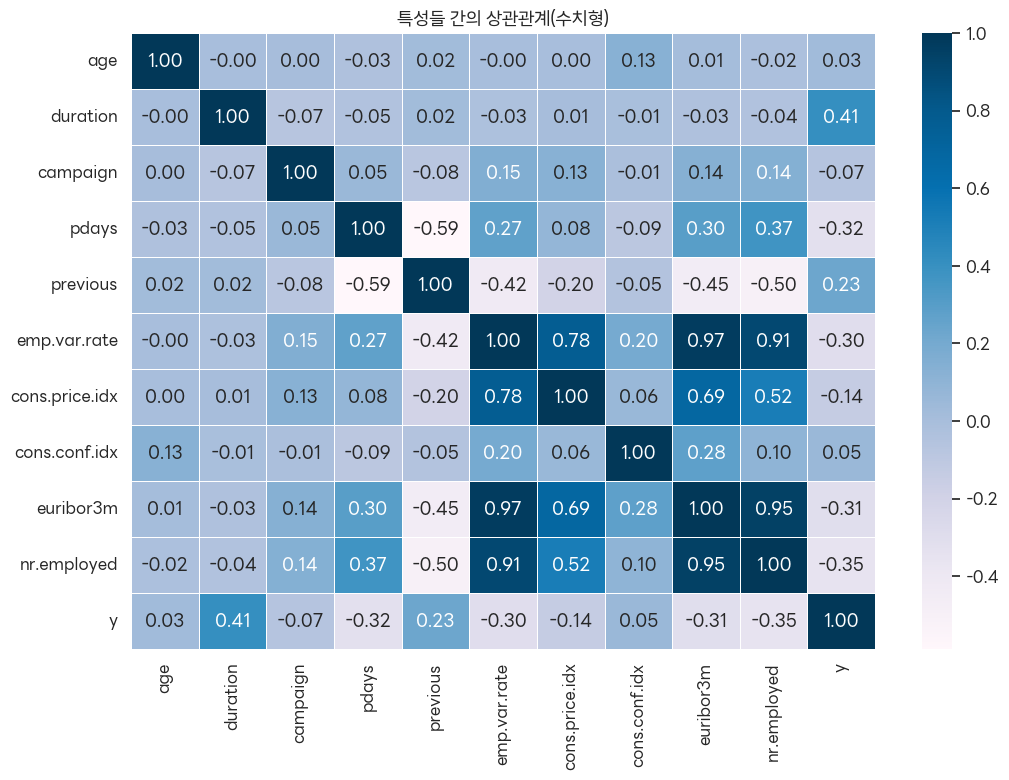

In [39]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.2f', cmap='PuBu', linewidths=0.5)
plt.title('특성들 간의 상관관계(수치형)')
plt.show()

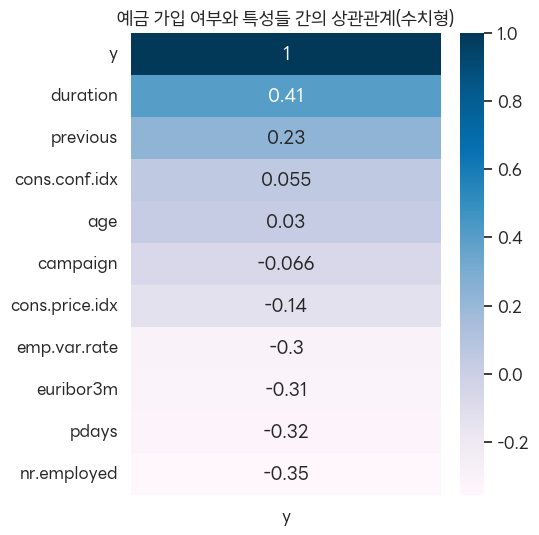

In [40]:
plt.figure(figsize= (5,6))
sns.heatmap(data.corr(numeric_only=True)[['y']].sort_values(by='y',ascending=False),annot=True, cmap='PuBu')
plt.title('예금 가입 여부와 특성들 간의 상관관계(수치형)')
plt.show()

In [41]:
# 파이차트 = 전체 비율 시각화
# 스택 바 차트 = 예금 가입 여부별 비율 시각화
def check_cat_graph(data, cat_cols, target):

    for col in cat_cols:
        if col == target:
            continue

        plt.figure(figsize=(17, 7))

        # 파이 차트
        plt.subplot(1,2,1)
        data[col].value_counts().plot(
            kind='pie', autopct='%.2f%%', cmap='Pastel2')
        plt.title(f'{col} 파이 차트')

        # 스택 바 차트
        plt.subplot(1,2,2)
        stacked_data = data.groupby(col)[target].value_counts(normalize=True).unstack()
        sorted_order = data[col].value_counts().index
        stacked_data = stacked_data.loc[sorted_order]

        ax = plt.gca()
        stacked_data.plot(kind='bar', stacked=True, ax=ax, color=['beige','darkseagreen'])
        plt.title(f'{col}의 막대그래프(Stacked)')
        plt.xlabel(col)
        plt.xticks(rotation=22)
        plt.ylabel('Percentage')
        plt.legend(title=target)
        
        # 백분율 텍스트 추가 
        cumulative = np.zeros(len(stacked_data)) # 초기화
        for idx, column in enumerate(stacked_data.columns):
            for i, value in enumerate(stacked_data[column]):
                cumulative[i] += value  # 누적 값 계산
                ax.text(
                    i, cumulative[i] - value / 2,  # 막대 중앙 위치
                    f'{value * 100:.1f}%',  # 백분율 변환
                    ha='center', va='center', color='black', fontsize=12
                )

        plt.tight_layout()
        plt.show()

In [43]:
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','day_of_week','poutcome']

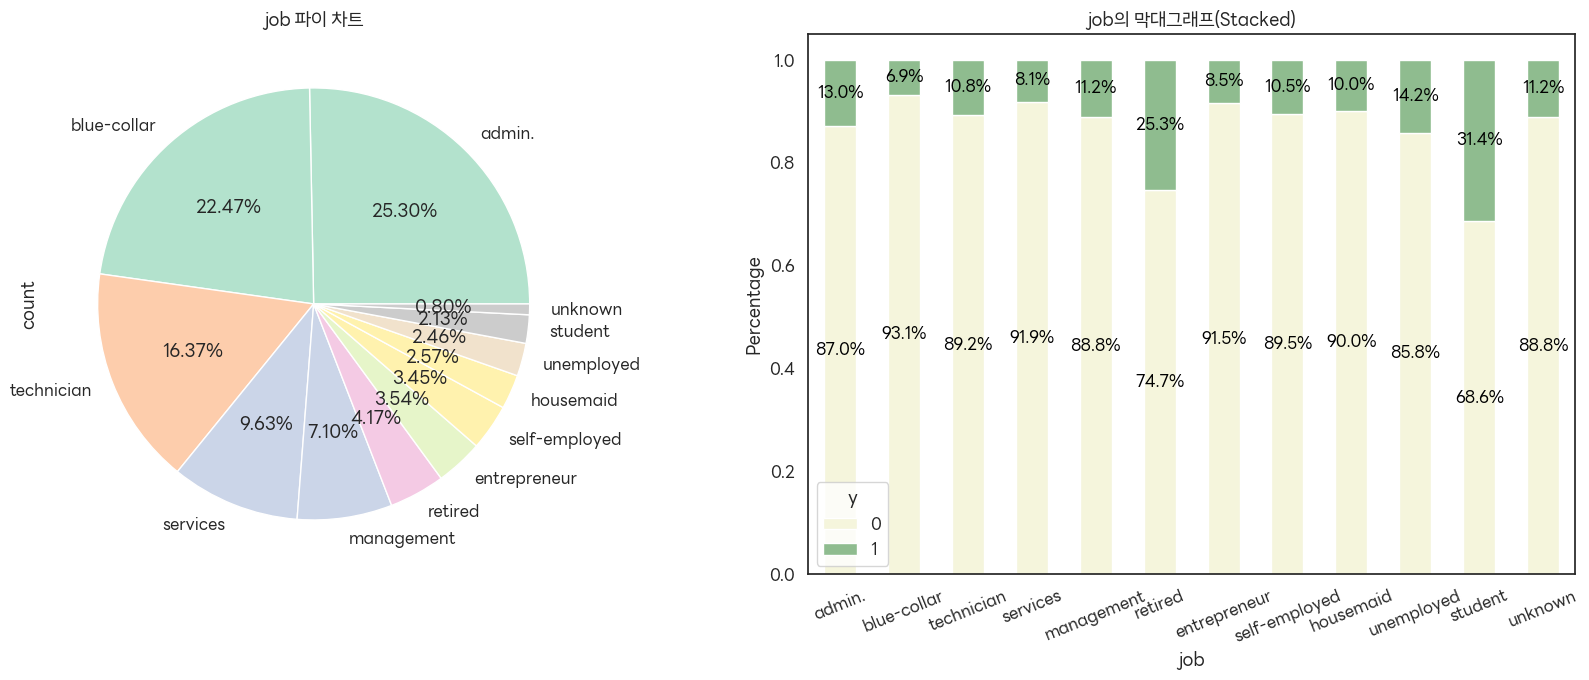

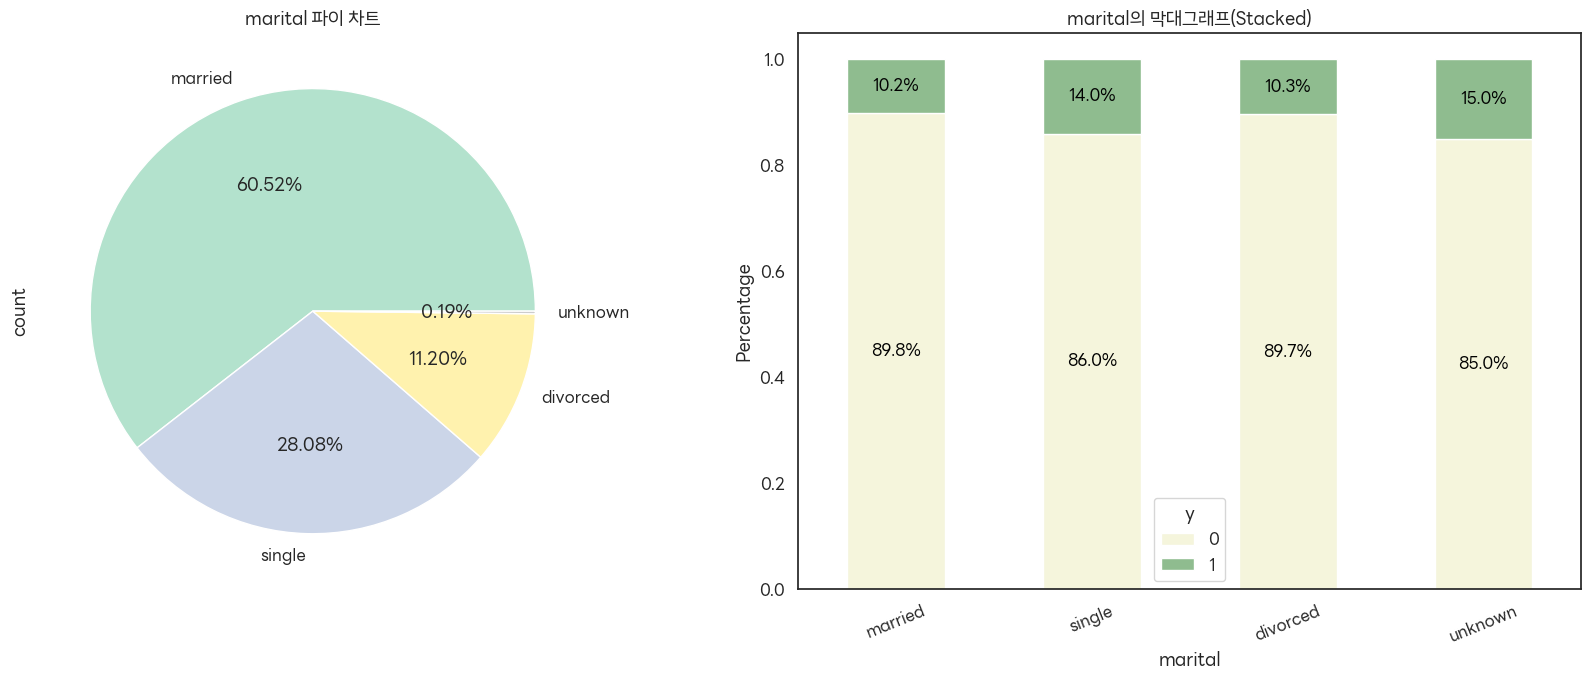

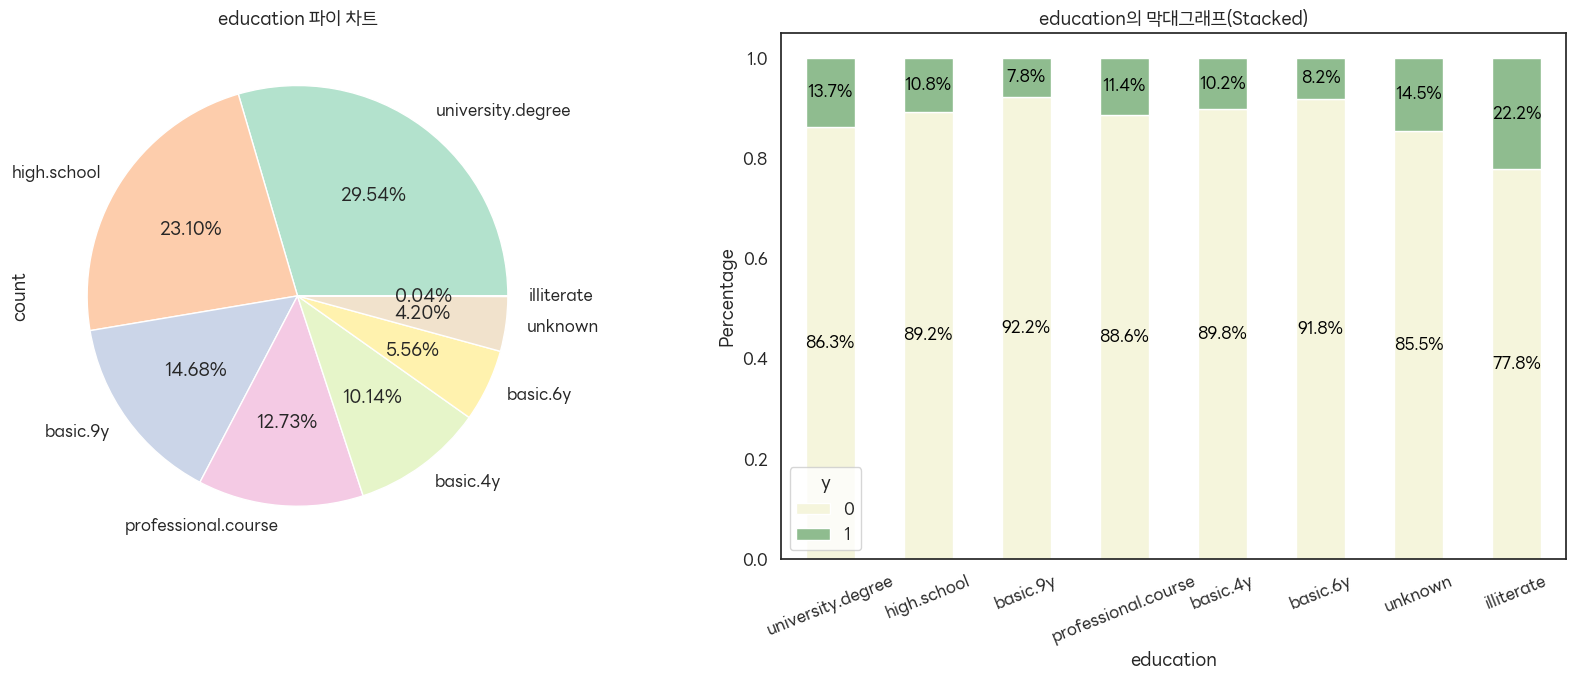

posx and posy should be finite values
posx and posy should be finite values


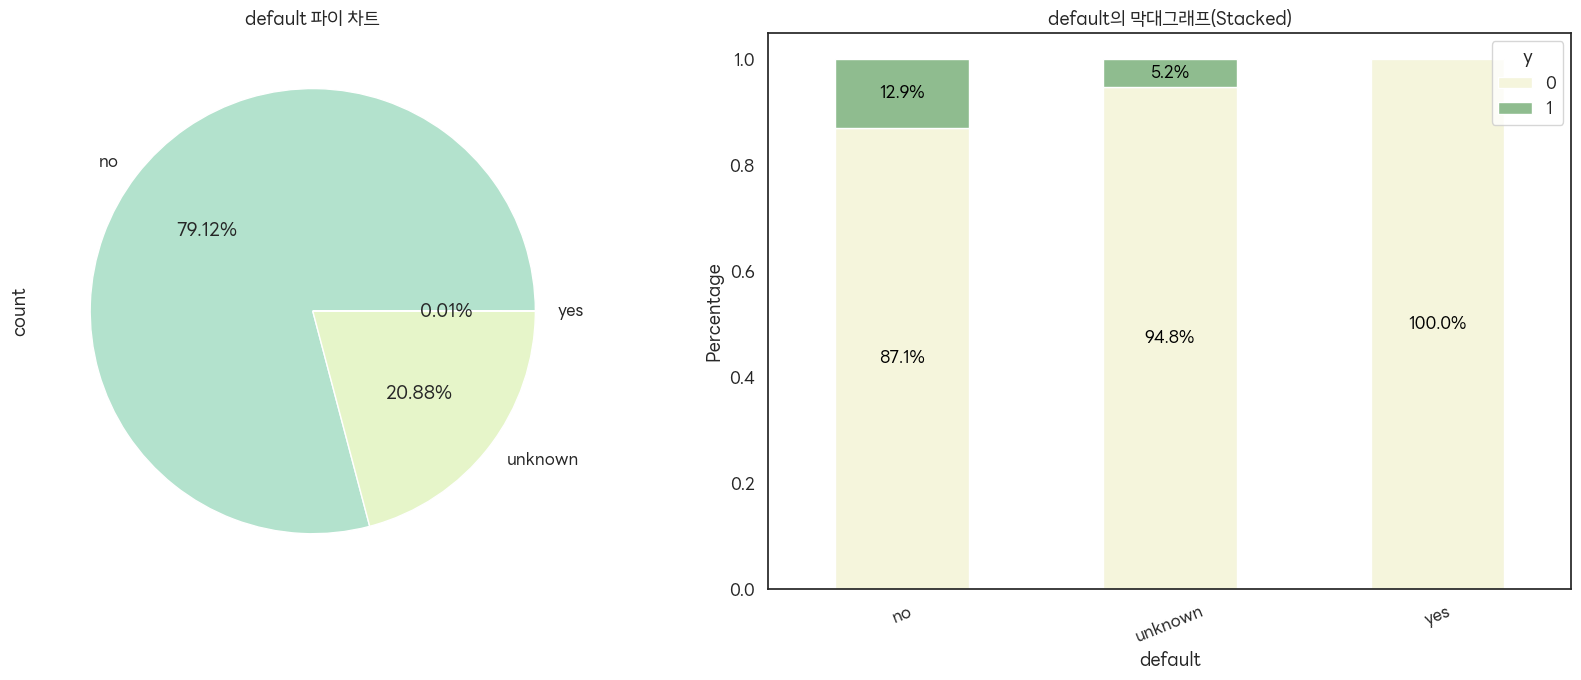

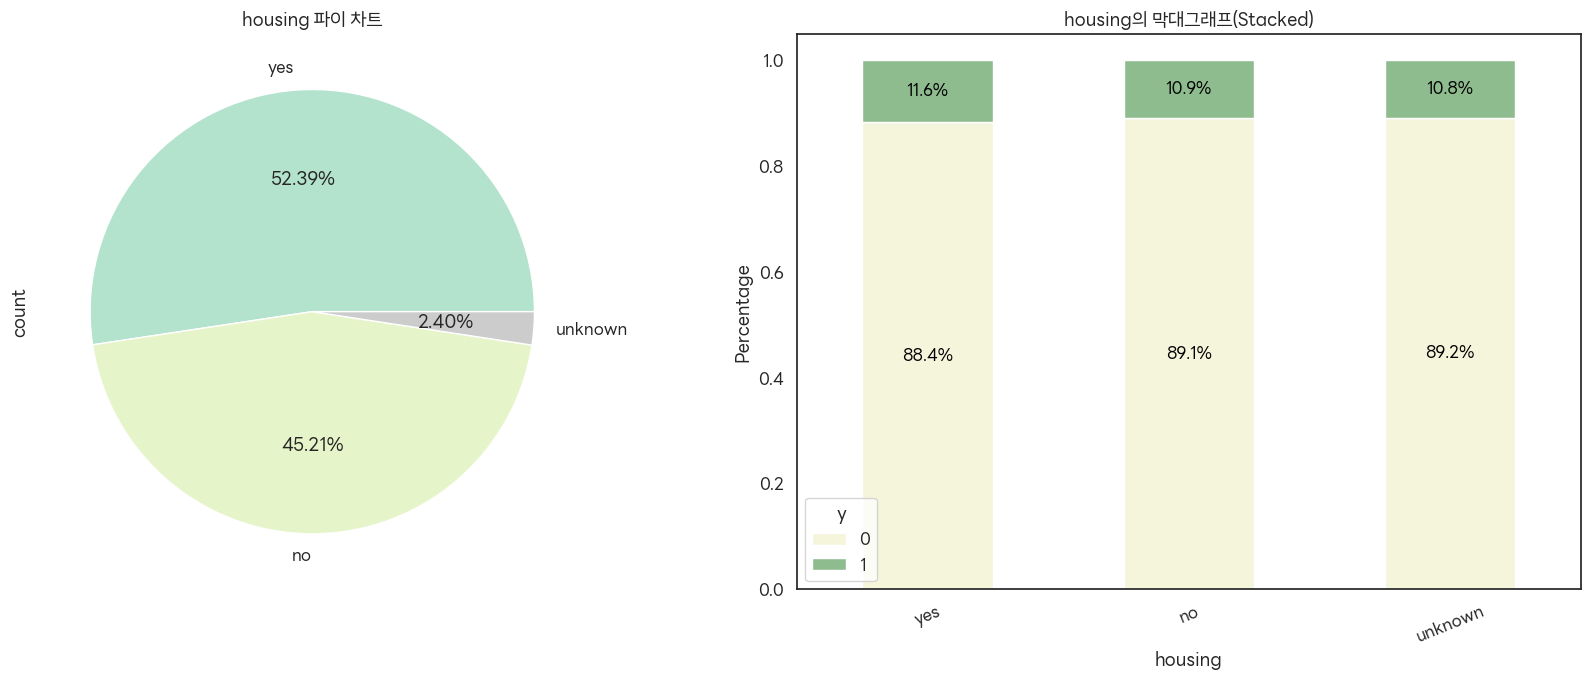

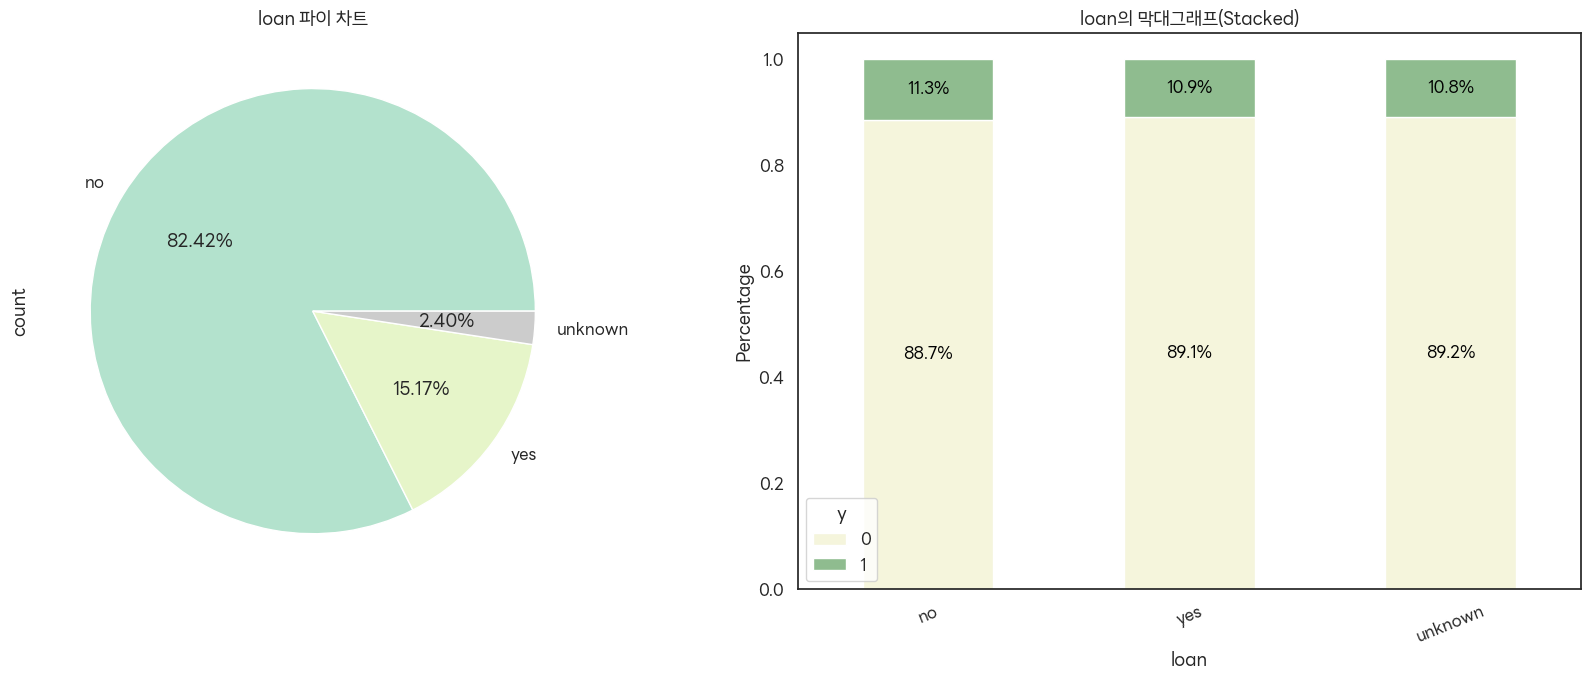

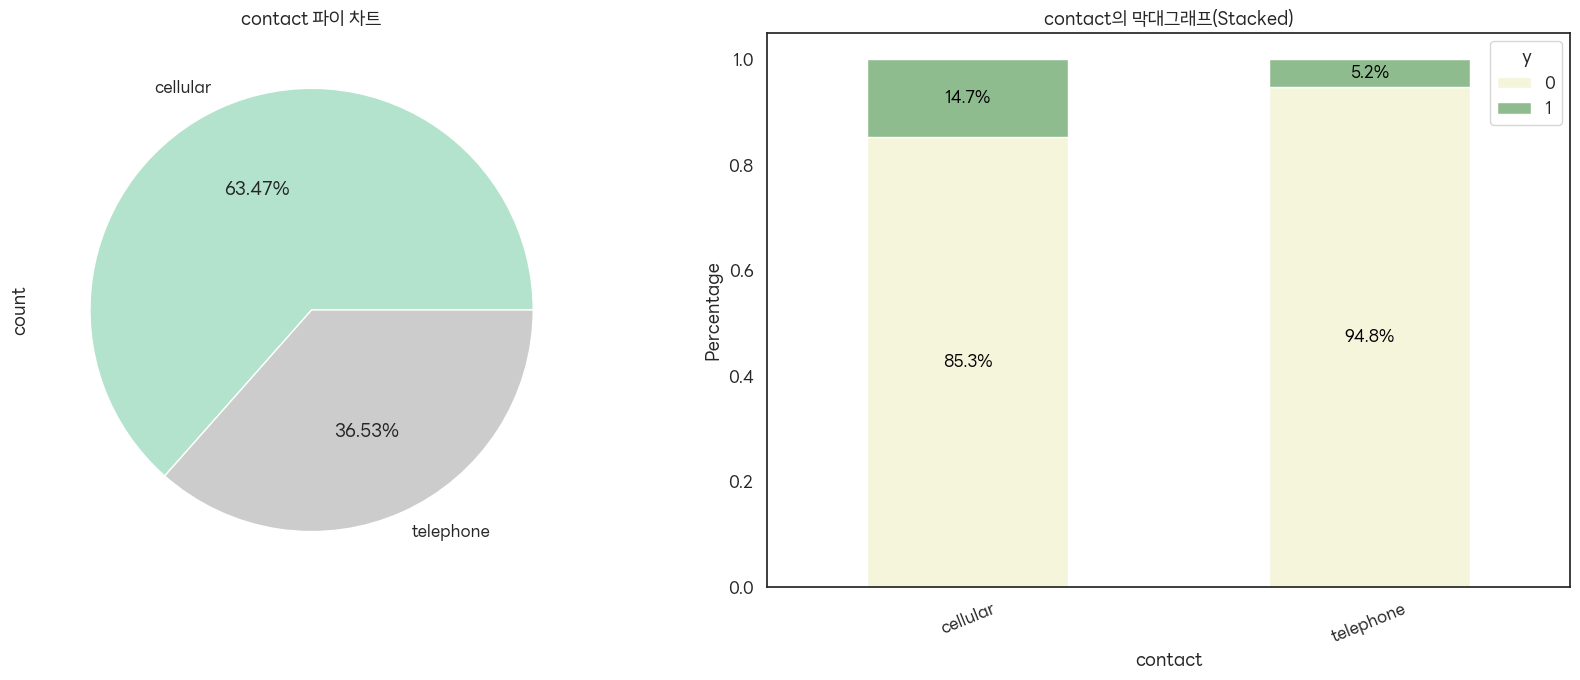

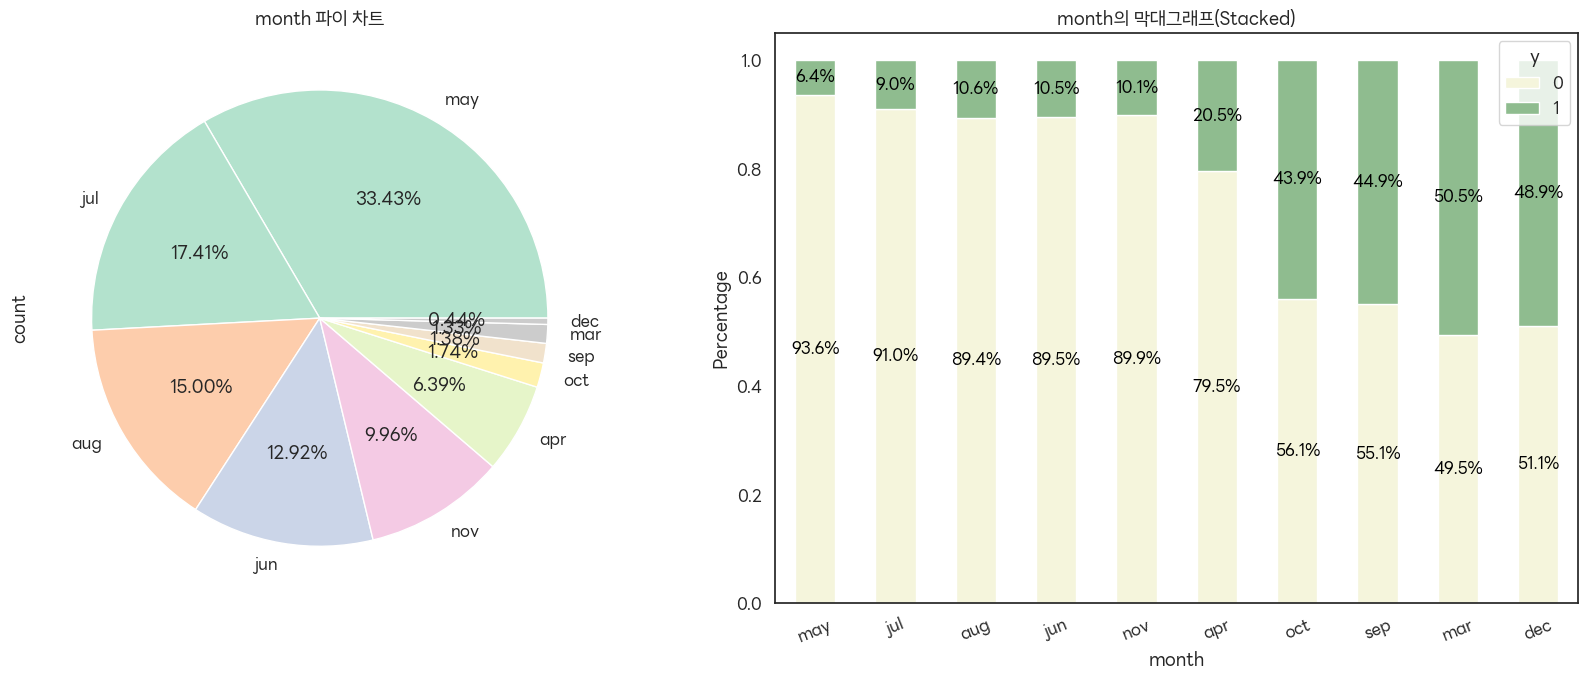

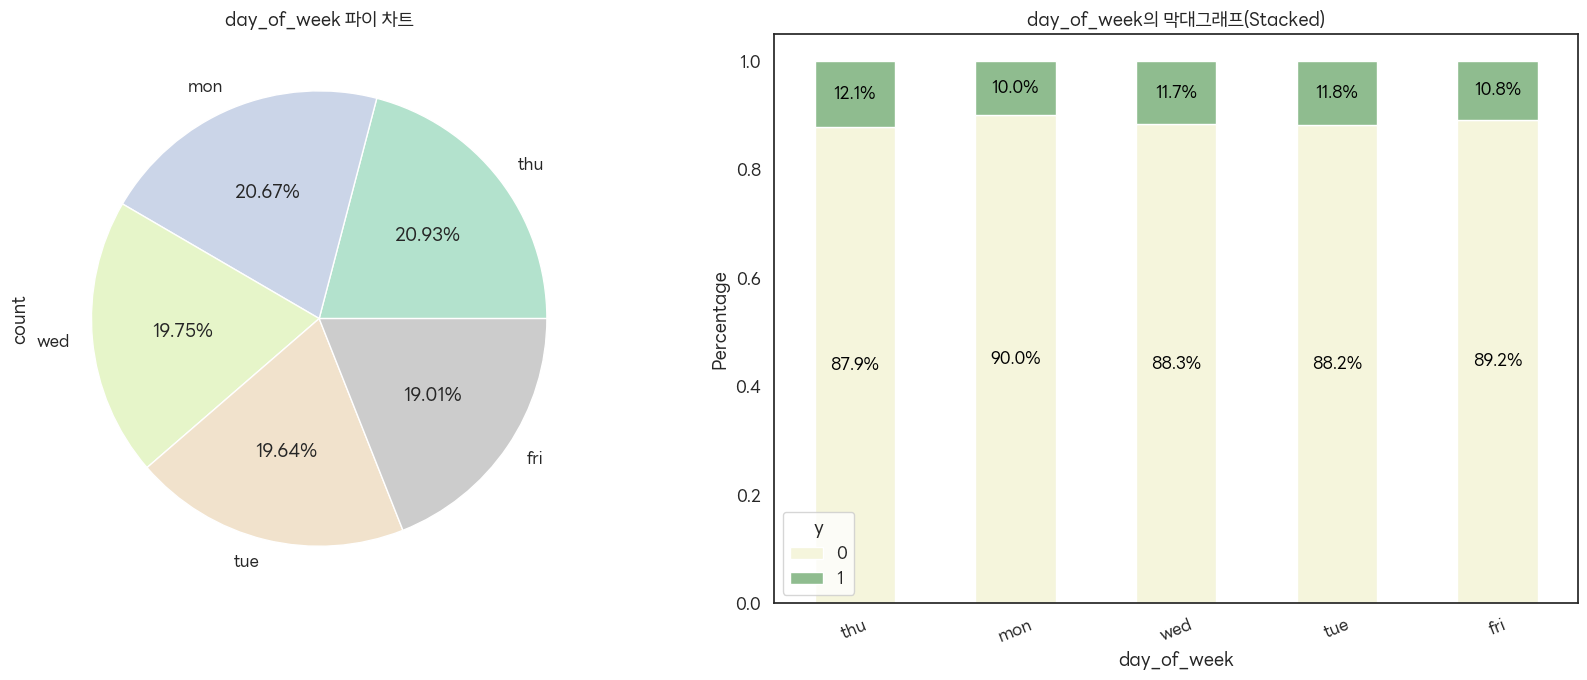

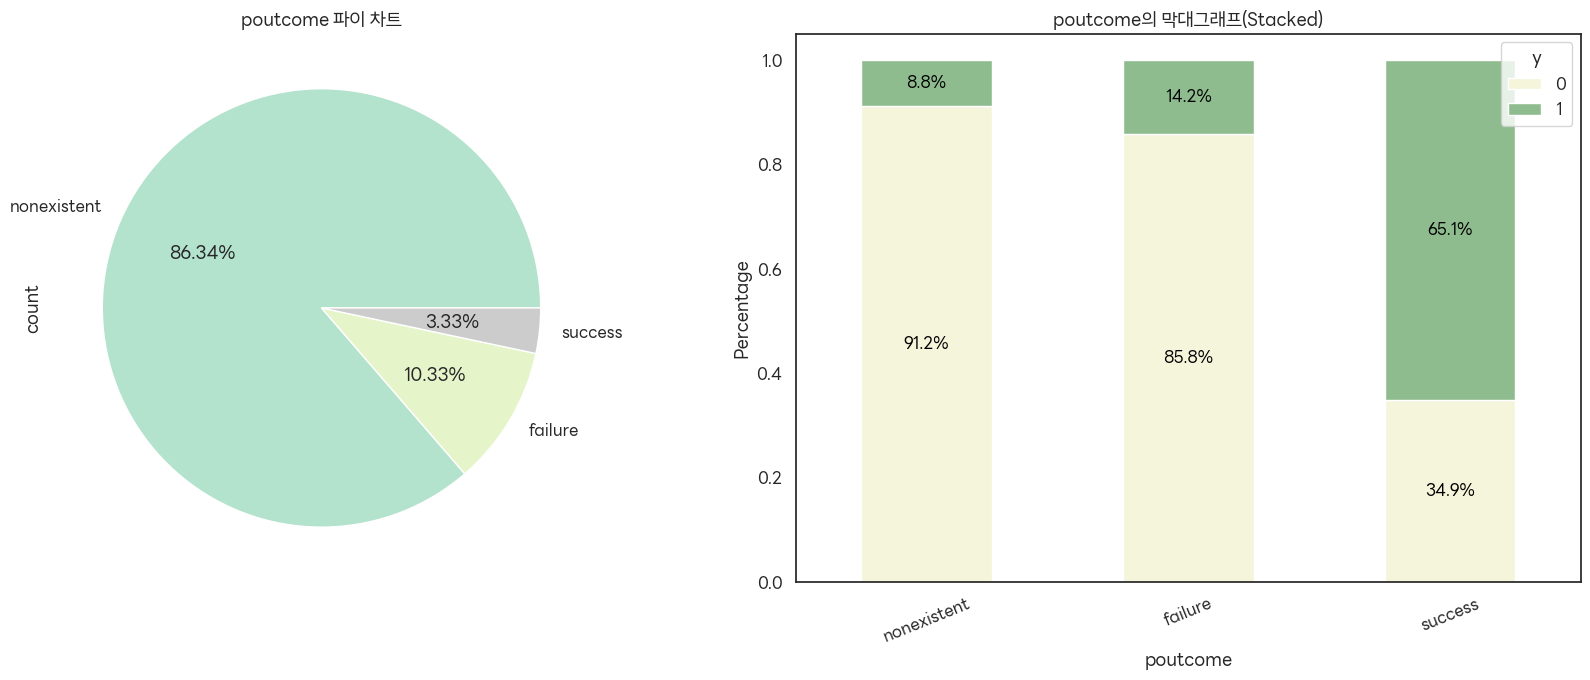

In [47]:
check_cat_graph(data, cat_cols, 'y')

In [48]:
# 'loan' 컬럼 : no와 yes의 비중 차이가 있음 -> 트리 기반 모델을 사용할 것이기에 상관X

#### default 컬럼

In [50]:
# default 값은 "yes"가 너무 적음(신뢰성 낮음)
# --> 해결법) 1. 사용안한다(컬럼). 2. yes와 no만 유지 / unknown 삭제 3. unknown 을 별도의 변수를 만들고 yes/no를 유지
data['default'].value_counts()

default
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

In [51]:
# 신뢰도가 낮기에 사용 안 함.
data = data.drop(columns = ['default'])
data.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


#### job 컬럼 그룹화
--> 카테고리 개수가 많아 모델학습에 불리하게 작용할 수 있기에 그룹화해서 카테고리 개수 줄이기

In [57]:
data['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

In [59]:
# white_collar(사무직) : admin., management, 
# blue_collar(현장직) : blue-collar, services, housemaid
# business(사업 관련 직업) : entrepreneur, self-employed     
# technician(기술직) 유지
# special(특수한 경우) : student, retired
# etc(기타) : unemployed, unknown

In [61]:
def categorize_job(job):
    if job in ['admin.','management']:
        return 'white_collar'
    
    elif job in ['blue-collar','service','housemaid']:
        return 'bule_collar'

    elif job in ['entrepreneur', 'self-employed']:
        return 'business'

    elif job in ['technician']:
        return 'technician'

    elif job in ['retired','student']:
        return 'special'

    else:
        return 'etc'

In [63]:
data['grouped_job'] = data['job'].apply(categorize_job)
data.head(10)

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,grouped_job
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,bule_collar
1,57,services,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc
2,37,services,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,white_collar
4,56,services,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc
5,45,services,married,basic.9y,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc
6,59,admin.,married,professional.course,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,white_collar
7,41,blue-collar,married,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,bule_collar
8,24,technician,single,professional.course,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,technician
9,25,services,single,high.school,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc


In [65]:
data.drop('job', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   marital         41176 non-null  object 
 2   education       41176 non-null  object 
 3   housing         41176 non-null  object 
 4   loan            41176 non-null  object 
 5   contact         41176 non-null  object 
 6   month           41176 non-null  object 
 7   day_of_week     41176 non-null  object 
 8   duration        41176 non-null  int64  
 9   campaign        41176 non-null  int64  
 10  pdays           41176 non-null  int64  
 11  previous        41176 non-null  int64  
 12  poutcome        41176 non-null  object 
 13  emp.var.rate    41176 non-null  float64
 14  cons.price.idx  41176 non-null  float64
 15  cons.conf.idx   41176 non-null  float64
 16  euribor3m       41176 non-null  float64
 17  nr.employed     41176 non-null  floa

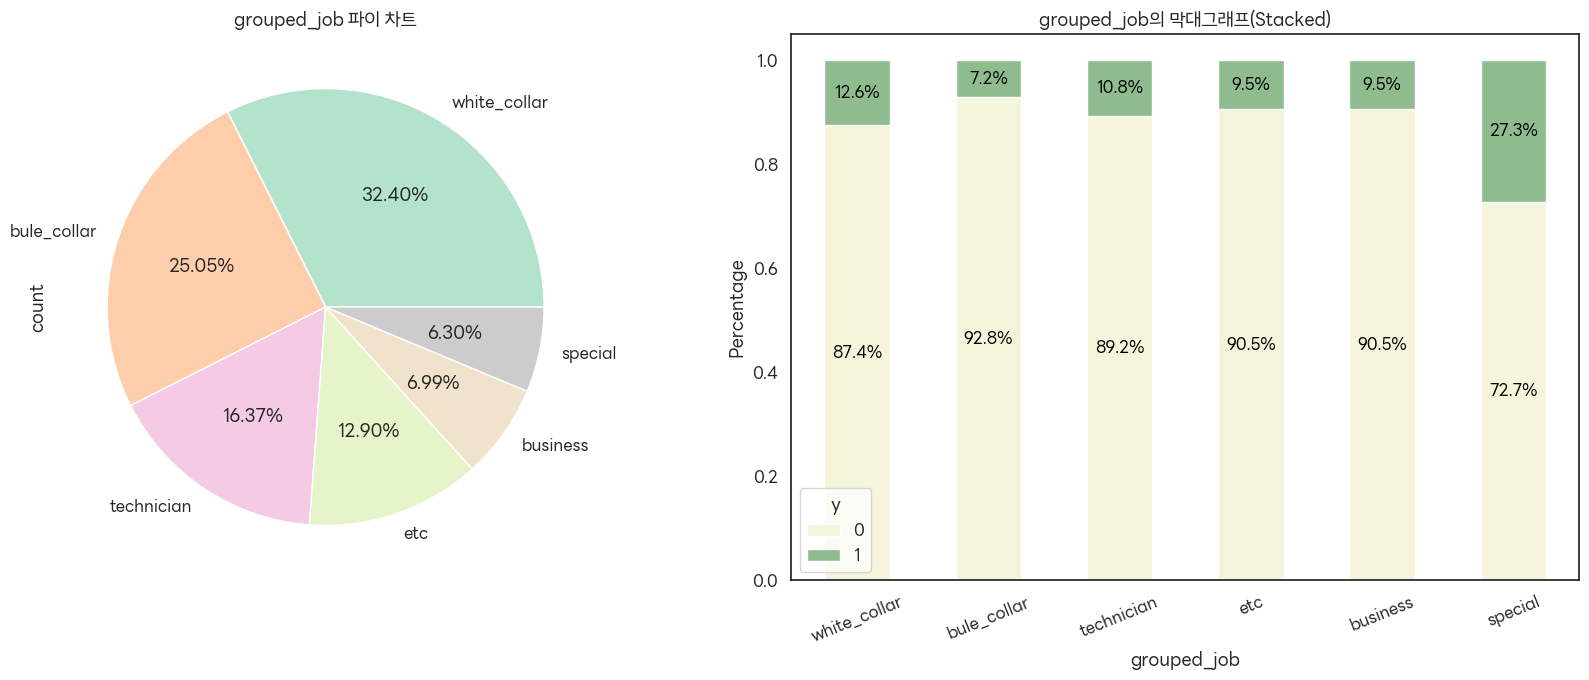

In [67]:
check_cat_graph(data,['grouped_job'], 'y')

In [68]:
# 구간과 라벨 설정
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 99, float('inf')]
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대', '100세 이상']

# Categorical dtype으로 age_group 생성
data['grouped_age'] = pd.cut(data['age'], bins=bins, labels=labels)

/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_1580/3327177442.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data, x='grouped_age', y='y', errorbar=None, palette='Pastel2')


<Axes: xlabel='grouped_age', ylabel='y'>

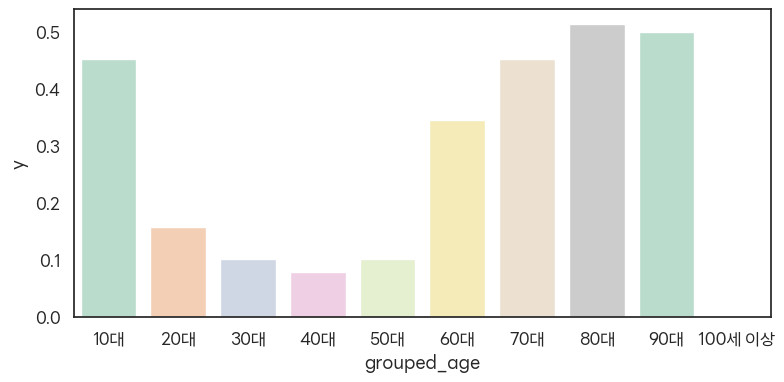

In [69]:
plt.figure(figsize= (9,4))
sns.barplot(data, x='grouped_age', y='y', errorbar=None, palette='Pastel2')

# 모델링 준비

## 데이터셋

In [77]:
data.head()

,age,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,grouped_job,grouped_age
0,56,married,basic.4y,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,bule_collar,50대
1,57,married,high.school,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc,50대
2,37,married,high.school,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc,30대
3,40,married,basic.6y,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,white_collar,40대
4,56,married,high.school,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,etc,50대


In [79]:
df = data[['age','grouped_job','housing', 'loan', 'contact','pdays','campaign', 'previous', 
           'poutcome', 'cons.price.idx', 'emp.var.rate', 'euribor3m','nr.employed','y']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   grouped_job     41176 non-null  object 
 2   housing         41176 non-null  object 
 3   loan            41176 non-null  object 
 4   contact         41176 non-null  object 
 5   pdays           41176 non-null  int64  
 6   campaign        41176 non-null  int64  
 7   previous        41176 non-null  int64  
 8   poutcome        41176 non-null  object 
 9   cons.price.idx  41176 non-null  float64
 10  emp.var.rate    41176 non-null  float64
 11  euribor3m       41176 non-null  float64
 12  nr.employed     41176 non-null  float64
 13  y               41176 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 5.7+ MB


## 데이터 분리

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X = df.drop(columns=['y'])
y = df['y']
X.shape, y.shape

((41176, 13), (41176,))

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32940, 13), (8236, 13), (32940,), (8236,))

## 라벨 인코딩 + 원-핫 인코딩

 1   grouped_job     41176 non-null  object 
 
 2   housing         41176 non-null  object 
 
 3   loan            41176 non-null  object 
 
 4   contact         41176 non-null  object 
 
 7   poutcome        41176 non-null  object 

In [91]:
from sklearn.preprocessing import LabelEncoder

In [93]:
# 범주형 컬럼만 선택
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['grouped_job', 'housing', 'loan', 'contact', 'poutcome'], dtype='object')

In [95]:
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [97]:
# 디코딩
for col in cat_cols:
    print(f"{col} 매핑: {dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))}")

grouped_job 매핑: {'bule_collar': 0, 'business': 1, 'etc': 2, 'special': 3, 'technician': 4, 'white_collar': 5}
housing 매핑: {'no': 0, 'unknown': 1, 'yes': 2}
loan 매핑: {'no': 0, 'unknown': 1, 'yes': 2}
contact 매핑: {'cellular': 0, 'telephone': 1}
poutcome 매핑: {'failure': 0, 'nonexistent': 1, 'success': 2}


# 트리 모델

In [100]:
from sklearn.metrics import classification_report

## Decision Tree
- 장점 : 해석에 용이하고 시각화가 가능
- 단점 : 과적합 가능성이 높음

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth=2, random_state=42).fit(X_train, y_train)
dt

DecisionTreeClassifier(max_depth=2, random_state=42)

In [105]:
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7265
           1       0.73      0.16      0.26       971

    accuracy                           0.89      8236
   macro avg       0.81      0.58      0.60      8236
weighted avg       0.88      0.89      0.86      8236



In [106]:
# 중요도 추출
importances = dt.feature_importances_
features = X_train.columns
importances, features

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.14253138, 0.05436234,
        0.        , 0.        , 0.80310628]),
 Index(['age', 'grouped_job', 'housing', 'loan', 'contact', 'pdays', 'campaign',
        'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'euribor3m',
        'nr.employed'],
       dtype='object'))

/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_1580/1596398417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Pastel1')


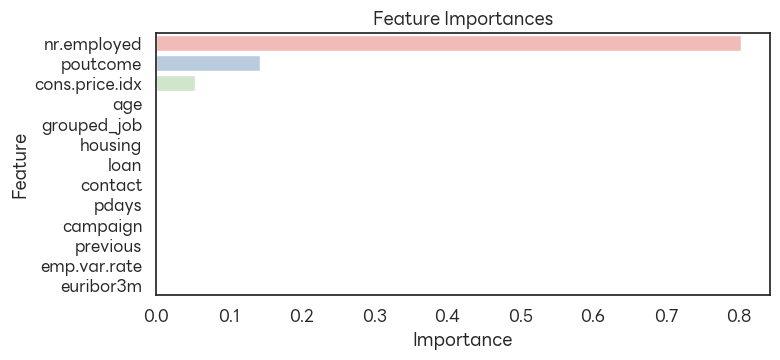

In [107]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 3.8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Pastel1')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

#### 인사이트
- 모델이 한 변수(nr.employed)에 과도하게 의존
- euribor3m, emp.var.rate, previous, campaign 등은 거의 쓰이지 않았고, 이들을 제거해도 성능 변화가 없을 수 있음.
- 의사결정 트리의 단점이 드러남. → 하나의 피처에 지나치게 의존해 분기가 단순해짐.

**(그래프 분석)**
- 가장 중요한 feature = nr.employed(고용된 사람 수) : (0.8) → 모델이 대부분 이 변수 하나만으로 예측을 하고 있다
- 그 다음으로 중요한 변수는 poutcome (과거 캠페인 결과), cons.price.idx (소비자 물가 지수)인데, 비중이 0.1 이하로 작다.
- 나머지 변수들은 거의 0에 가까워, 거의 의사결정 트리 분기에서 사용되지 않았다.

In [113]:
from sklearn.tree import plot_tree

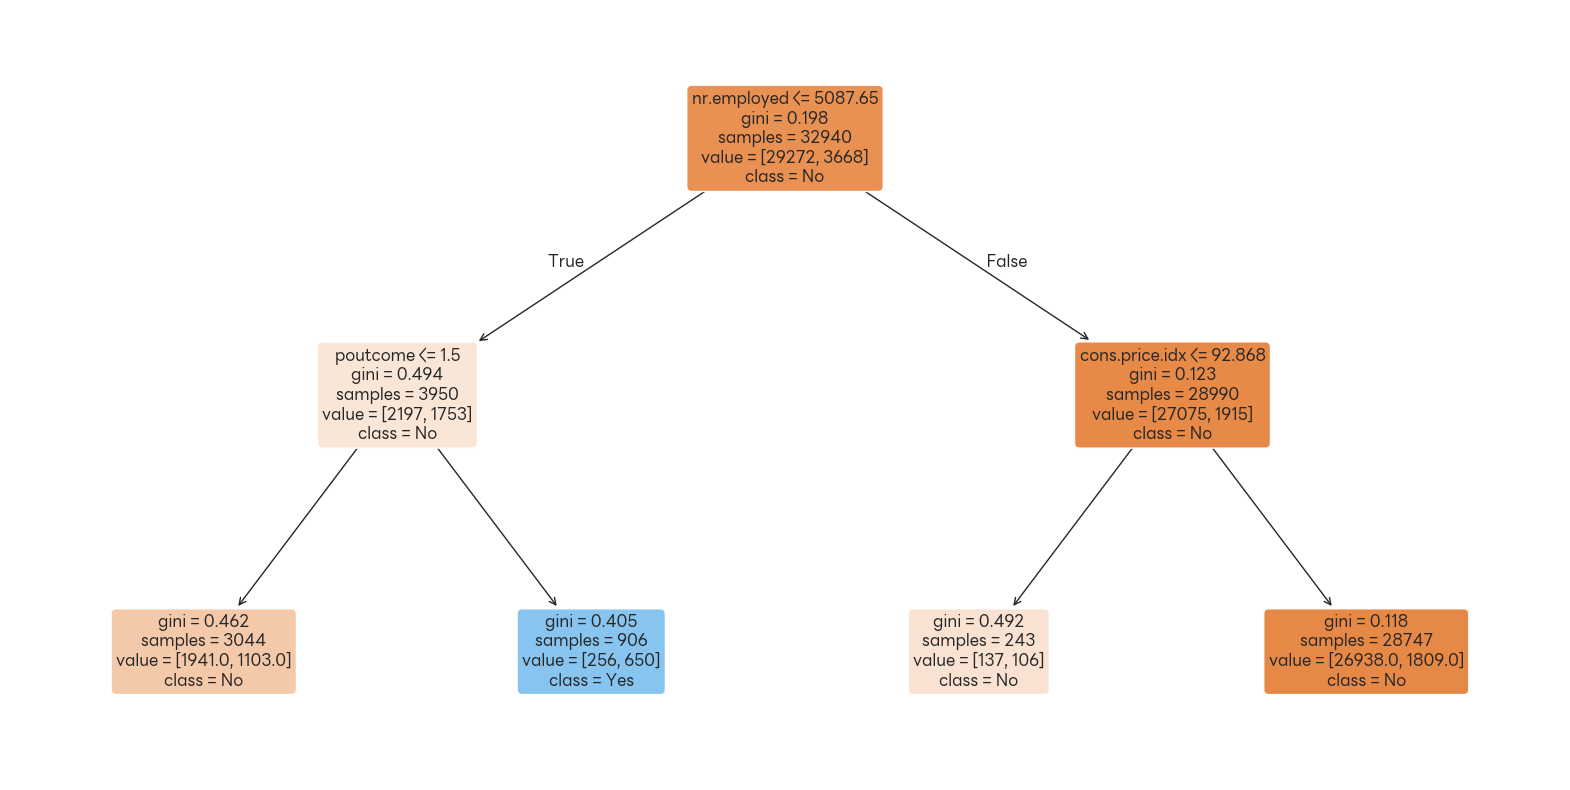

In [115]:
# 시각화
plt.figure(figsize=(20,10))
plot_tree(dt, 
          feature_names=X_train.columns, 
          class_names=['No', 'Yes'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.show()

# 앙상블

## RandomForest
- 장점 : 안정적, 변수 중요도 파악에 용이함
- 단점 : 느릴 수 있다.

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [121]:
# 파라미터 그리드 정의
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [None, 10, 20],
    'class_weight': ['balanced']
}

In [122]:
# 모델 정의
rf = RandomForestClassifier(random_state=42)
rf

RandomForestClassifier(random_state=42)

In [126]:
# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    return_train_score=True
)

In [128]:
# 학습
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [None, 10, 20],
                         'n_estimators': [100, 150, 200, 250, 300]},
             return_train_score=True, scoring='accuracy')

In [129]:
# 최적 모델 추출
best_rf = grid_search.best_estimator_
best_rf

RandomForestClassifier(class_weight='balanced', max_depth=20, n_estimators=150,
                       random_state=42)

In [130]:
# 예측 및 평가
y_pred = best_rf.predict(X_test)
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차검증 점수:", round(grid_search.best_score_, 4))
print("테스트 정확도:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

최적 파라미터: {'class_weight': 'balanced', 'max_depth': 20, 'n_estimators': 150}
최고 교차검증 점수: 0.8847
테스트 정확도: 0.8763

Classification Report:

              precision    recall  f1-score   support

           0     0.9132    0.9500    0.9313      7265
           1     0.4646    0.3244    0.3820       971

    accuracy                         0.8763      8236
   macro avg     0.6889    0.6372    0.6567      8236
weighted avg     0.8603    0.8763    0.8665      8236



In [131]:
# 결과 데이터프레임 생성
# grid_search.cv_results_ : GridSearchCV가 교차 검증 과정에서 수집한 모든 실험 결과
results_df = pd.DataFrame(grid_search.cv_results_)

# mean_test_score와 rank_test_score로 정렬
# mean_test_score : 5-fold 교차검증에서 각 조합의 평균 성능 점수 → 내림차순 정렬 : 성능이 가장 좋은 조합이 위로 오도록 함.
# rank_test_score : 평균 성능을 기준으로 순위 매기는 것
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
results_df['rank_test_score'] = results_df['mean_test_score'].rank(ascending=False).astype(int)

# 상위 몇 개 보기
display(results_df[['param_n_estimators', 'param_max_depth', 'mean_test_score', 'rank_test_score']].head())

,param_n_estimators,param_max_depth,mean_test_score,rank_test_score
11,150,20,0.884669,1
12,200,20,0.884214,2
13,250,20,0.884032,3
14,300,20,0.883880,4
10,100,20,0.883637,5


In [132]:
# 결과 데이터프레임 생성
results_df = pd.DataFrame(grid_search.cv_results_)

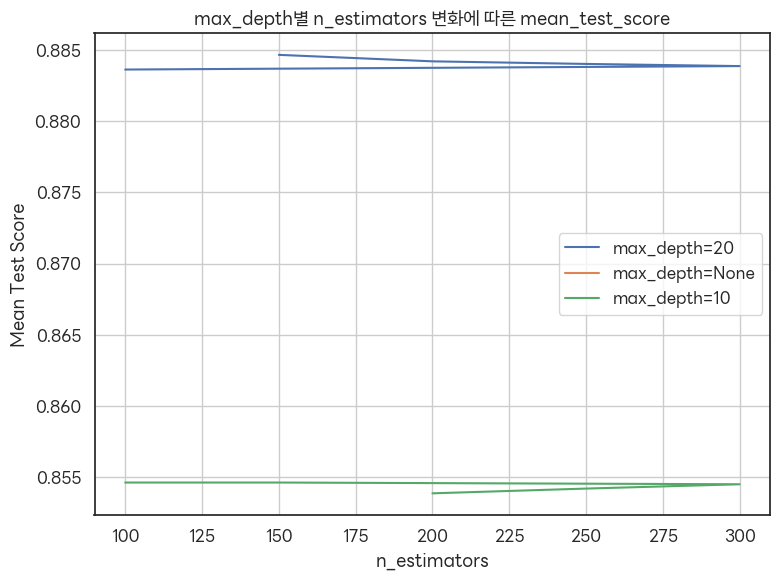

In [134]:
# 시각화 (max_depth별 n_estimators 변화)
plt.figure(figsize=(8, 6))

for depth in results_df['param_max_depth'].unique():
    subset = results_df[results_df['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'], label=f"max_depth={depth}")

plt.title("max_depth별 n_estimators 변화에 따른 mean_test_score")
plt.xlabel("n_estimators")
plt.ylabel("Mean Test Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 인사이트
- (max_depth=20) : 모델의 성능은 최상임을 알 수 있다. 트리의 깊이를 제한하지 않는다면, 성능이 현저히 낮아지는 것을 볼 수 있다.
- (max_depth=10) : 모델이 너무 단순하여 학습을 잘 하지 못함.

In [136]:
# 중요도 추출
importances = best_rf.feature_importances_
features = X_train.columns
importances, features

(array([0.24158799, 0.08140226, 0.02943513, 0.02445145, 0.01843864,
        0.02413919, 0.1037706 , 0.0162146 , 0.02676174, 0.04864956,
        0.06932082, 0.22576968, 0.09005834]),
 Index(['age', 'grouped_job', 'housing', 'loan', 'contact', 'pdays', 'campaign',
        'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'euribor3m',
        'nr.employed'],
       dtype='object'))

/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_1580/1596398417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Pastel1')


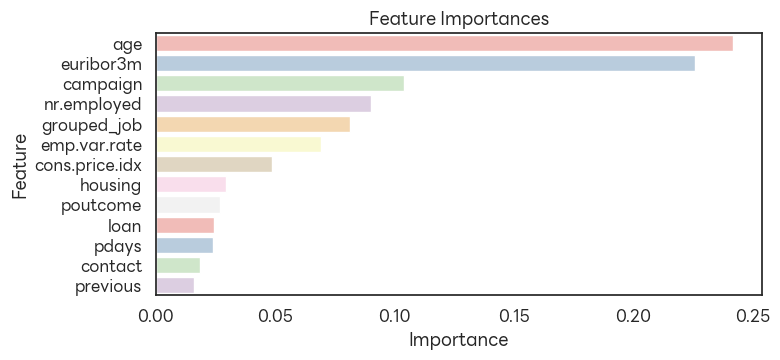

In [137]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 3.8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Pastel1')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

#### 인사이트
**(영향력 있는 변수)**
- age: 나이가 많고 적음이 예금 가입 여부에 가장 큰 영향을 주는 것으로 보여짐.
- euribor3m: 유럽 기준금리로 경제적 요인이 큰 영향을 끼치는 것으로 보여줌.
- campaign: 마케팅 접촉 횟수가 중요 요인인 것 같음.

- nr.employed: 고용 인구 수 (경제적 지표)
- grouped_job: 직업군에 따른 행동 패턴 차이가 있을 수 있음.

**(해석)**
- 개인 특성 (age, job)과 경제적 지표 (euribor3m, nr.employed, emp.var.rate), 그리고 마케팅 전략(campaign)에 민감하게 반응한다.

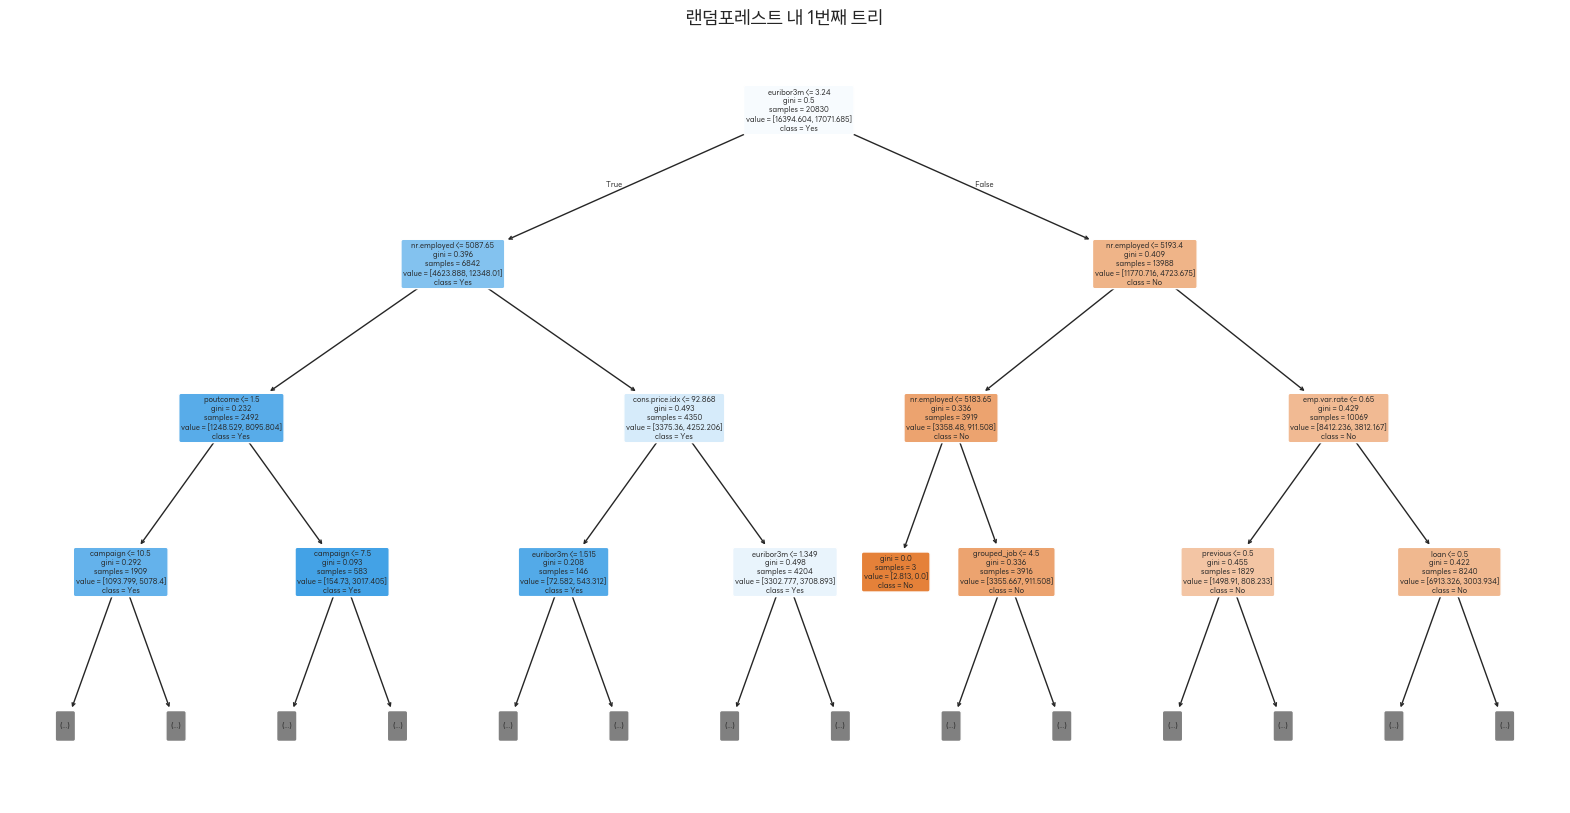

In [139]:
estimator = best_rf.estimators_[0]  # 첫 번째 트리 선택

plt.figure(figsize=(20, 10))
plot_tree(estimator, 
          feature_names=X_train.columns, 
          class_names=['No', 'Yes'],  # 예측 클래스 이름 (종속 변수)
          filled=True, 
          rounded=True, 
          max_depth=3)  # 깊이를 제한해 복잡도를 낮춤
plt.title("랜덤포레스트 내 1번째 트리")
plt.show()

## XGBoost
- 장점 : 높은 성능, 결측치 자동 처리
- 단점 : 하이퍼파라미터 조정이 복잡함

In [143]:
#pip install xgboost

In [144]:
import xgboost as xgb

In [145]:
data['y'].value_counts()

y
0    36537
1     4639
Name: count, dtype: int64

In [146]:
36537/4639

7.876050873032981

In [147]:
param_grid = {
    'n_estimators': [200, 250, 300, 350, 400],
    'max_depth': [3, 4, 5],
    'min_child_weight': [3, 4, 5],
    'scale_pos_weight': [7],
    'reg_alpha': [0.1, 0.05],
    'reg_lambda': [3, 4, 5, 6]
}

In [148]:
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [149]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

In [150]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:27:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_child_weight': [3, 4, 5],
                         'n_estimators': [200, 250, 300, 350, 400],
                         'reg_alpha': [0.1, 0.05], 'reg_lambda': [3, 4, 5, 6],
                         'scale_pos_weight': [7]},
             scoring='accuracy', verbose=1)

In [151]:
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)

In [152]:
print("최적 파라미터:", grid_search.best_params_)
print("최고 교차검증 점수:", round(grid_search.best_score_, 4))
print("테스트 정확도:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

최적 파라미터: {'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 250, 'reg_alpha': 0.1, 'reg_lambda': 3, 'scale_pos_weight': 7}
최고 교차검증 점수: 0.8477
테스트 정확도: 0.8458

Classification Report:

              precision    recall  f1-score   support

           0     0.9430    0.8783    0.9095      7265
           1     0.3982    0.6025    0.4795       971

    accuracy                         0.8458      8236
   macro avg     0.6706    0.7404    0.6945      8236
weighted avg     0.8787    0.8458    0.8588      8236



In [153]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_n_estimators,param_reg_alpha,param_reg_lambda,param_scale_pos_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.225874,0.014507,0.015451,0.004595,3,3,200,0.10,3,7,"{'max_depth': 3, 'min_child_weight': 3, 'n_est...",0.852611,0.849575,0.843048,0.836521,0.850486,0.846448,0.005902,47
1,0.220856,0.016572,0.018442,0.005606,3,3,200,0.10,4,7,"{'max_depth': 3, 'min_child_weight': 3, 'n_est...",0.851396,0.848664,0.845628,0.836217,0.848816,0.846145,0.005289,64
2,0.264105,0.013983,0.016982,0.006582,3,3,200,0.10,5,7,"{'max_depth': 3, 'min_child_weight': 3, 'n_est...",0.852155,0.849879,0.844262,0.836521,0.849727,0.846509,0.005628,43
3,0.260212,0.009901,0.014990,0.002133,3,3,200,0.10,6,7,"{'max_depth': 3, 'min_child_weight': 3, 'n_est...",0.853370,0.847905,0.844869,0.838494,0.847753,0.846478,0.004847,44
4,0.247433,0.018853,0.016221,0.002279,3,3,200,0.05,3,7,"{'max_depth': 3, 'min_child_weight': 3, 'n_est...",0.850789,0.847298,0.845628,0.838950,0.850789,0.846691,0.004359,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.601096,0.036864,0.058608,0.007075,5,5,400,0.10,6,7,"{'max_depth': 5, 'min_child_weight': 5, 'n_est...",0.838191,0.834699,0.837583,0.835003,0.840164,0.837128,0.002048,356
356,0.649156,0.044595,0.057793,0.004902,5,5,400,0.05,3,7,"{'max_depth': 5, 'min_child_weight': 5, 'n_est...",0.841226,0.834244,0.840316,0.834699,0.842289,0.838555,0.003395,325
357,0.640858,0.068661,0.055719,0.007557,5,5,400,0.05,4,7,"{'max_depth': 5, 'min_child_weight': 5, 'n_est...",0.841682,0.833940,0.842441,0.833637,0.836825,0.837705,0.003735,344
358,0.642234,0.034611,0.061526,0.007352,5,5,400,0.05,5,7,"{'max_depth': 5, 'min_child_weight': 5, 'n_est...",0.838342,0.836066,0.838039,0.835003,0.841985,0.837887,0.002394,342


In [154]:
results_df = results_df.sort_values(by='mean_test_score', ascending=False)
results_df['rank_test_score'] = results_df['mean_test_score'].rank(ascending=False).astype(int)

display(results_df[['param_n_estimators', 'param_max_depth', 'param_min_child_weight',
                    'mean_test_score', 'rank_test_score']].head())

,param_n_estimators,param_max_depth,param_min_child_weight,mean_test_score,rank_test_score
88,250,3,5,0.847723,1
84,200,3,5,0.847571,2
85,200,3,5,0.847420,3
86,200,3,5,0.847420,3
23,300,3,3,0.847298,5


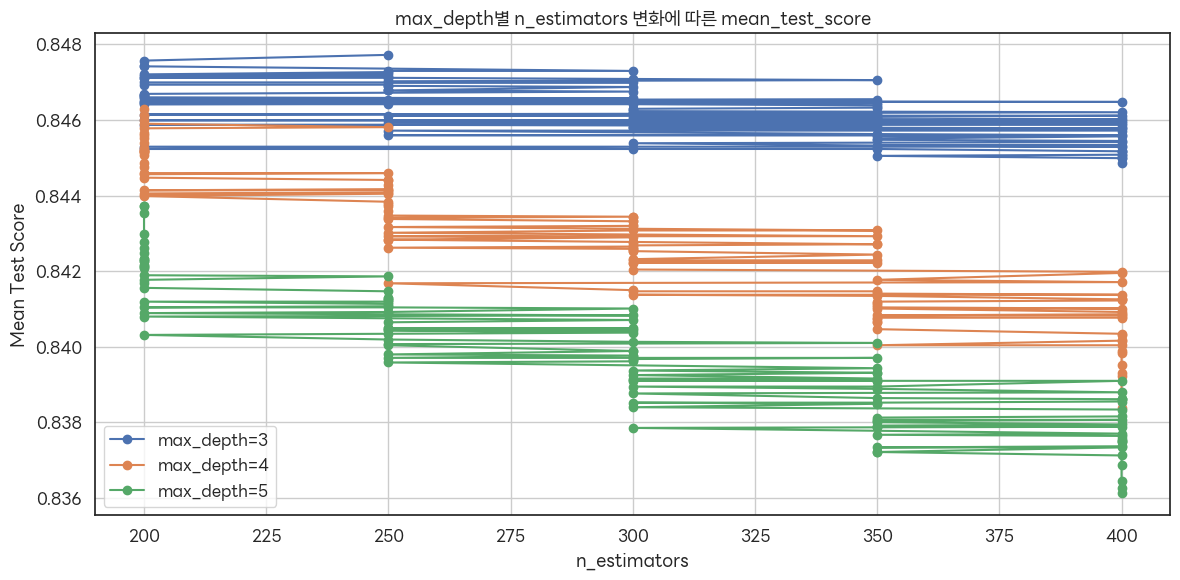

In [197]:
plt.figure(figsize=(12, 6))

for depth in sorted(results_df['param_max_depth'].unique()):
    subset = results_df[results_df['param_max_depth'] == depth]
    plt.plot(subset['param_n_estimators'], subset['mean_test_score'],
             label=f"max_depth={depth}", marker='o')

plt.title("max_depth별 n_estimators 변화에 따른 mean_test_score")
plt.xlabel("n_estimators")
plt.ylabel("Mean Test Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 인사이트
**(max_depth)**
- max_depth=3가 가장 높은 mean_test_score를 보이며, 특히 n_estimators가 200-300 사이일 때 성능이 좋다

**(n_estimators)**
- ? 어떻게 해석해야하지 ?

**(최적의 모델 선택)**
- max_depth=3과 max_depth=4의 경우가 유리하지만, 복잡도와 안정성을 고려할 때 max_depth=3가 상대적으로 더 좋은 선택으로 보인다.

In [157]:
# 중요도 추출
importances = best_xgb.feature_importances_
features = X_train.columns
importances, features

(array([0.00667099, 0.00785508, 0.00723684, 0.00882173, 0.01877515,
        0.023552  , 0.00774257, 0.00492985, 0.04908089, 0.03898495,
        0.03375421, 0.01842375, 0.774172  ], dtype=float32),
 Index(['age', 'grouped_job', 'housing', 'loan', 'contact', 'pdays', 'campaign',
        'previous', 'poutcome', 'cons.price.idx', 'emp.var.rate', 'euribor3m',
        'nr.employed'],
       dtype='object'))

/var/folders/g6/368p423d117c1pt_9pkjmw4w0000gn/T/ipykernel_1580/1596398417.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Pastel1')


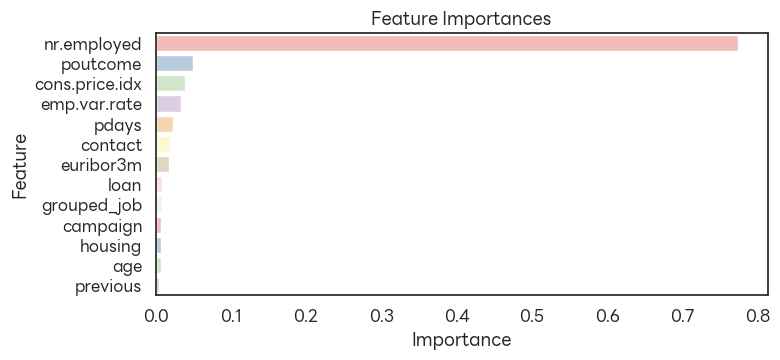

In [158]:
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 3.8))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Pastel1')
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

#### 인사이트
(**nr.employed**)
- nr.employed 변수 하나만으로도 모델 예측의 대부분을 설명하고 있음 (0.77)
- 전체 고용 수치(nr.employed)가 고객의 예금 가입 여부와 매우 밀접하게 연관되어 있다는 것을 의미함.

(모델의 학습 편향 가능성이 의심됨)
- nr.employed를 제외한 특성들의 중요도가 미미하다.